# Data Mining


### New York Stock Exchange


Fundamental analysis is to analyze the future profitability of the company.
Generally speaking, the results from fundamental analysis don’t change with short-term news. 
Being a relevant indicator for long-term investment, the fundamental analysis relies on both
historical and present data to measure revenues, assets, costs, liabilities, and so on.



### Technical analysis 

Analyzes measurable data from stock market activities, such as stock prices, historical returns,
and volume of historical trades; i.e. quantitative information that could identify trading signals
and capture the movement patterns of the stock market. 

Technical analysis focuses on historical data and current data just like fundamental analysis,
but it’s mainly used for short-term trading purposes.

Due to its short-term nature, technical analysis results are easily influenced by news.

Popular technical analysis methodologies include moving average (MA), support and resistance 
levels, as well as trend lines and channels. 


### Target variable in this use case will be 'Estimated Shares Outstanding'

Shares outstanding refers to,
the number of shares of common stock a company has issued to investors and company executives.




Why shares outstanding is useful ? 

A company's number of shares outstanding is used to calculate many widely used financial metrics.
Market capitalization -- share price * number of shares outstanding
-- and EPS are both computed using a company's number of outstanding shares.


1. <b> outstanding </b> is the number of shares investors and company executives currently own
2. <b> number of issued shares </b> is the number of shares that have ever been traded in the stock market.
 issued shares includes any shares the company has bought back and now holds in its treasury.
3.<b> float </b> refers to the number of shares available to be traded by the public and
excludes any shares held by company executives or the company's treasury.


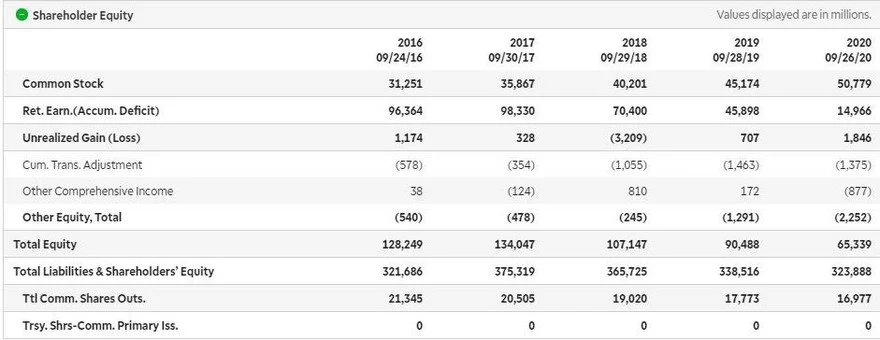


### Regression Analysis 

This is a statistical technique which can be 
used for short to medium term forecasting 
which seeks to establish the line of 'best fit' to the observed data.
Regression analysis should only be made for the near to medium term future. 



### Linear Regression 

It has been found that to calculate the line of best fit mathematically
it is necessary to calculate a line which minimises the total of the 
squared deviations of the actual observations from the calculated lines. 
This is known as the method of least squares or the least squares method of linear regression.

Linear regression gives equal importance to all the items in the time series, the older and the more recent. 
Since we observed that there are records from 2003, we do not have to consider removing thoes values. 

### Understanding the outstanding per share

The number of shares outstanding for a company =  number of 
shares issued  - number of shares held in the company's treasury

If a company buys back its own stock,
those repurchased shares are called <b>treasury stock </b>.

The number of shares outstanding increases if a company sells more shares to the public,
splits its stock, or employees redeem stock options. 
The number of shares outstanding decreases if the company buys back shares or a reverse stock split is completed.


## A standard machine learning pipeline



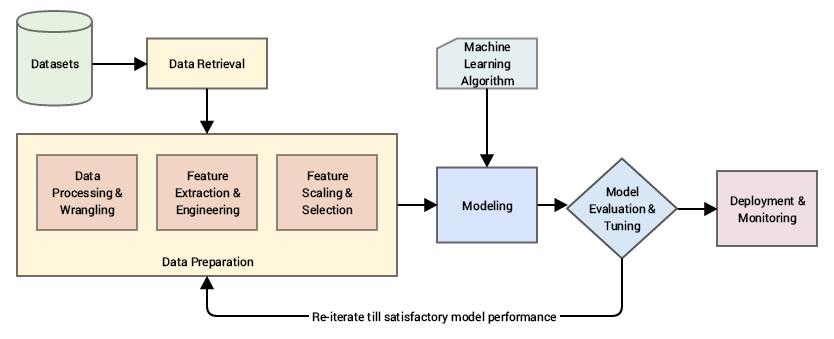

In [95]:
"""
Import libraries
"""

'\nImport libraries\n'

In [1]:
import pandas as pd
import os 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import gcf
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from  sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
#from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (120,40)


## Load Data Sources


In [2]:
data_path = r"C:\Users\isharahu\Downloads\course_work_data_mining\data"
fundamentals = "fundamentals.csv"
fundamentals_df = pd.read_csv(os.path.join(data_path , fundamentals))

In [3]:
df_fundamental = fundamentals_df.copy()

In [4]:
df_fundamental=df_fundamental.drop(columns=['Unnamed: 0'])
df_fundamental=df_fundamental.reset_index(drop=True)

## Check Data Profile


In [5]:
summary = df_fundamental.describe()
print("numerical column count :" , len(summary.columns))

numerical column count : 76


In [6]:
summary

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.781000e+03         1.781000e+03                1.781000e+03   
mean       4.673418e+09        -6.353484e+07                6.908940e+07   
std        1.406047e+10         7.562794e+08                6.848143e+08   
min        0.000000e+00        -6.452000e+09               -6.768000e+09   
25%        5.160000e+08        -1.040000e+08               -2.638000e+06   
50%        1.334000e+09        -1.830000e+07                2.000000e+06   
75%        3.246000e+09         7.816000e+06                3.359200e+07   
max        2.069390e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus   Cash Ratio  \
count    1781.000000          1.781000e+03     1.781000e+03  1482.000000   
mean       43.601348         -1.251925e+09     5.351784e+09    74.457490   
std       233.924028          2.979963e+09     1.133977e+10   102.298374   
min         0.000000         -3.798500e+10    -7.215000e+08     0.000000   
25%        10.000000         -1.151200e+09     4.791000e+08    17.000000   
50%        16.000000         -3.580000e+08     1.997080e+09    41.000000   
75%        26.000000         -1.291000e+08     5.735000e+09    90.000000   
max      5789.000000          5.000000e+06     1.082880e+11  1041.000000   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
count               1.781000e+03            1.781000e+03   1.781000e+03   
mean                8.521399e+09           -6.787749e+07   1.608543e+09   
std                 5.432105e+10            3.903369e+08   9.177636e+09   
min                 2.100000e+04           -5.562000e+09   0.000000e+00   
25%                 3.088000e+08           -5.400000e+07   1.628000e+06   
50%                 8.625900e+08            0.000000e+00   7.725000e+06   
75%                 2.310000e+09            0.000000e+00   2.970000e+08   
max                 7.281110e+11            3.755000e+09   1.581420e+11   

       Cost of Revenue  Current Ratio  Deferred Asset Charges  \
count     1.781000e+03    1482.000000            1.781000e+03   
mean      1.235213e+10     186.771255            5.908020e+08   
std       3.041419e+10     128.066801            2.666744e+09   
min       0.000000e+00      17.000000            0.000000e+00   
25%       1.194400e+09     109.000000            0.000000e+00   
50%       3.685000e+09     152.000000            0.000000e+00   
75%       9.800600e+09     226.000000            1.471490e+08   
max       3.650860e+11    1197.000000            3.686000e+10   

       Deferred Liability Charges  Depreciation  \
count                1.781000e+03  1.781000e+03   
mean                 1.610769e+09  1.084239e+09   
std                  4.548630e+09  2.188300e+09   
min                  0.000000e+00 -4.480000e+08   
25%                  0.000000e+00  1.799000e+08   
50%                  2.060000e+08  4.280310e+08   
75%                  1.082831e+09  1.047000e+09   
max                  5.618100e+10  2.951700e+10   

       Earnings Before Interest and Tax  Earnings Before Tax  \
count                      1.781000e+03         1.781000e+03   
mean                       2.710102e+09         2.375333e+09   
std                        6.145345e+09         5.720792e+09   
min                       -2.792700e+10        -2.822600e+10   
25%                        5.851630e+08         4.900000e+08   
50%                        1.139200e+09         9.601170e+08   
75%                        2.586000e+09         2.255000e+09   
max                        7.905300e+10         7.872600e+10   

       Effect of Exchange Rate  \
count             1.781000e+03   
mean             -3.849098e+07   
std               1.626735e+08   
min              -3.067000e+09   
25%              -2.000000e+07   
50%              -6.000000e+05   
75%               0.000000e+00   
max               1.160000e+09   

       Equity Earnings/Loss Unc

In [7]:
summary.to_csv(r"C:\Users\isharahu\Downloads\course_work_data_mining\course_work\data_statistics.csv", index = False)

In [8]:
numerical_columns = (summary.columns).drop('For Year')
categorical_column = ['Ticker Symbol', 'For Year']
date_column = ['Period Ending']

# Preprocess the dataset


### 1. Handle missing values and outliers 


"""
Checking out missing value data types
For numerical columns -> Mean, Median, Mode
For Categorical columns -> Mode, K neighbours
"""

The imputation strategy.

- If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

- If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

- If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

- If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

## Impute numerical columns

In [9]:
def impute_features_for_numeric(df , column_list):
    
    df_imputed = df.copy()
    
    # make new columns indicating what will be imputed
    cols_with_missing = (col for col in column_list
                                     if df_imputed[col].isnull().any())

    for col in cols_with_missing:
        df_imputed[col + '_was_missing'] = df_imputed[col].isnull()
        
    features =  df_imputed.columns

    my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df_imputed))
    df_imputed.columns = features
    
    missing_columns = list(set( df_imputed.columns) - set(df.columns))
    df_imputed = df_imputed.drop(missing_columns, axis=1)
    
    return df_imputed , missing_columns

In [10]:
df_missing_numerical_columns = df_fundamental[numerical_columns].copy()
df_imputed_numerical_columns, missing_columns = impute_features_for_numeric( df_missing_numerical_columns, numerical_columns)
missing_columns

['Quick Ratio_was_missing',
 'Estimated Shares Outstanding_was_missing',
 'Earnings Per Share_was_missing',
 'Cash Ratio_was_missing',
 'Current Ratio_was_missing']

## Impute categorical columns

In [11]:
def impute_features_for_categorical(df , column_list):
    
    df_imputed = df.copy()
    
    # make new columns indicating what will be imputed
    cols_with_missing = (col for col in column_list
                                     if df_imputed[col].isnull().any())

    for col in cols_with_missing:
        df_imputed[col + '_was_missing'] = df_imputed[col].isnull()
        
    features =  df_imputed.columns

    my_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df_imputed))
    df_imputed.columns = features
    
    missing_columns = list(set( df_imputed.columns) - set(df.columns))
    df_imputed = df_imputed.drop(missing_columns, axis=1)
    
    return df_imputed , missing_columns

In [12]:
df_missing_categorical_columns = df_fundamental[categorical_column].copy()
df_imputed_categorical_columns, missing_columns_2 = impute_features_for_categorical( df_missing_categorical_columns,categorical_column)
missing_columns_2

['For Year_was_missing']

In [13]:
master_table = df_fundamental.copy()
master_table[numerical_columns] = df_imputed_numerical_columns
master_table[categorical_column] = df_imputed_categorical_columns

In [14]:
master_table.shape

(1781, 78)

## Outliers Handling


Why we are viewing features in box plots ? 
* Because we need to observe how the scale of the values are stretched. 
*  If we observe a larger variance we need to look feature scaling methods. Best is standard scaling. 
* But there are some instances where the scaling doesn't work. In that case, we apply logrithm functions to bring them down to a normal scale like others. 

---



<AxesSubplot:>

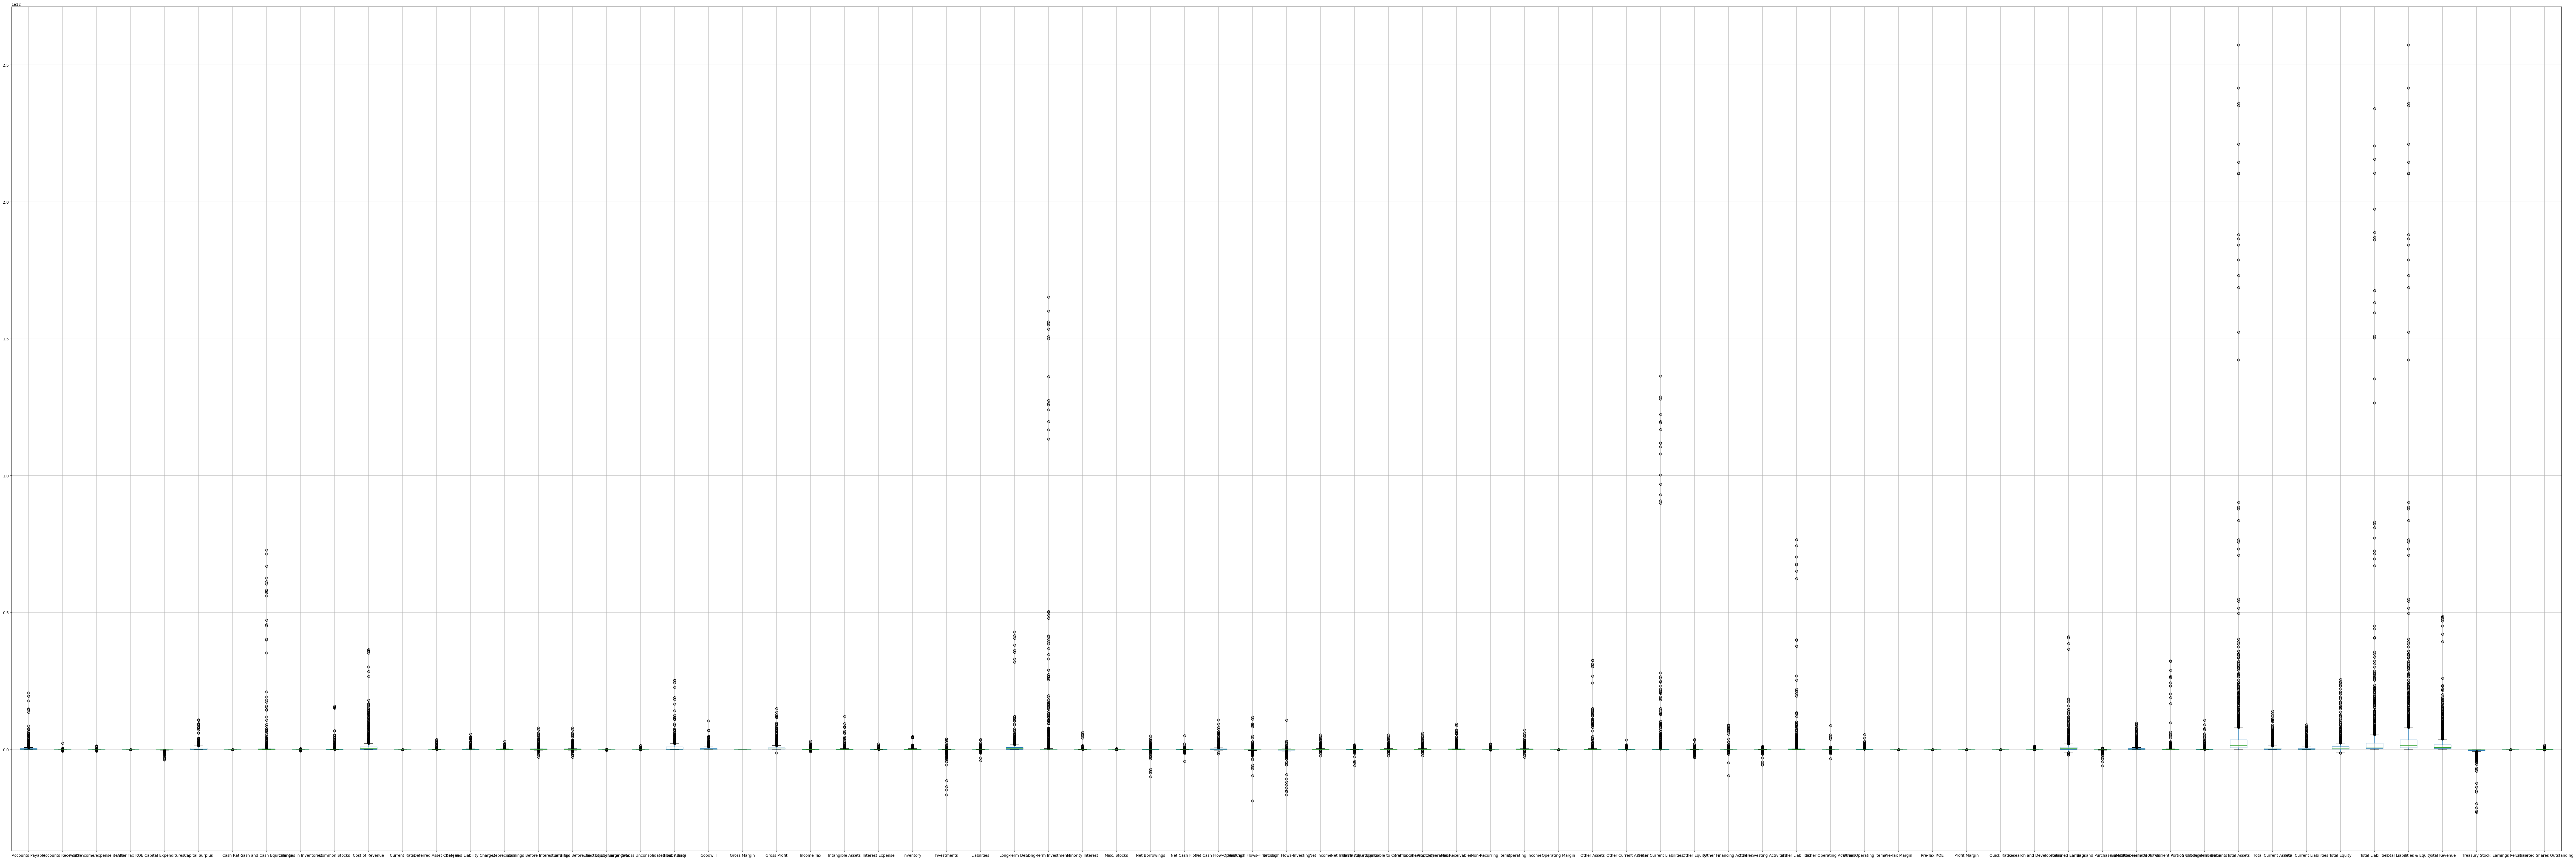

In [15]:
%matplotlib inline
df_imputed_numerical_columns.boxplot()

<AxesSubplot:>

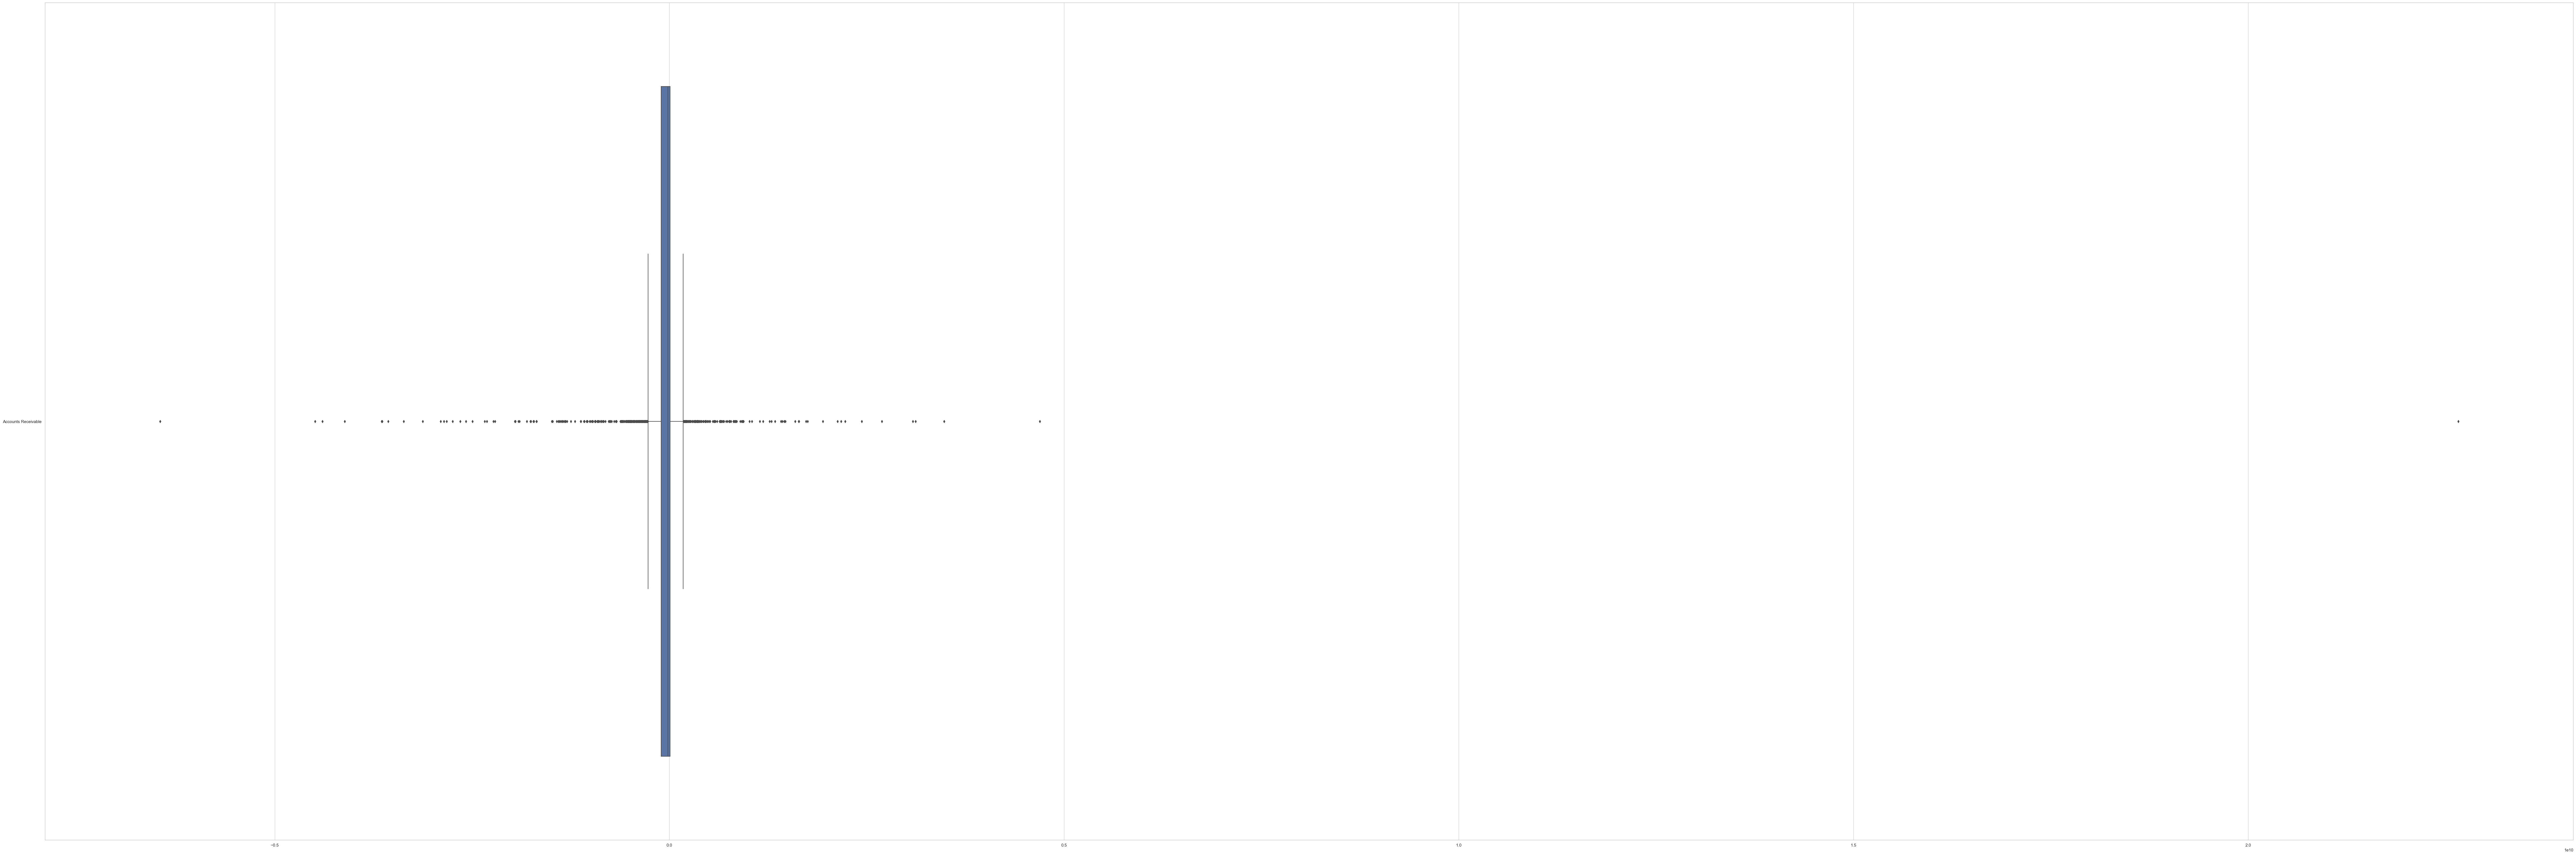

In [16]:
import seaborn
seaborn.set(style='whitegrid')
seaborn.boxplot(data=df_imputed_numerical_columns[['Accounts Receivable']], orient="h")

Do we replace outliers in a stock exchange ? 

Yes, if you observe the above boxplots, we are observing many outliers. 
what we are doing here is that,

In boxplot, it uses the median and the lower and upper quartiles. 


In [17]:
def replace_outliers(df) :
    
    df_replace_outliers = df.copy()
    for col in df_replace_outliers.columns: 
        ## Max and Min Quantile
        max_val = df_replace_outliers[col].quantile(0.95)
        min_val = df_replace_outliers[col].quantile(0.05)

        ## Replacing all the outliers
        
        df_replace_outliers.loc[df_replace_outliers[col] < min_val, col] = min_val
        df_replace_outliers.loc[df_replace_outliers[col] > max_val, col] = max_val
                    
    return df_replace_outliers

In [18]:
fundamental_table_with_outliers_replaced = replace_outliers(df_imputed_numerical_columns)

<AxesSubplot:>

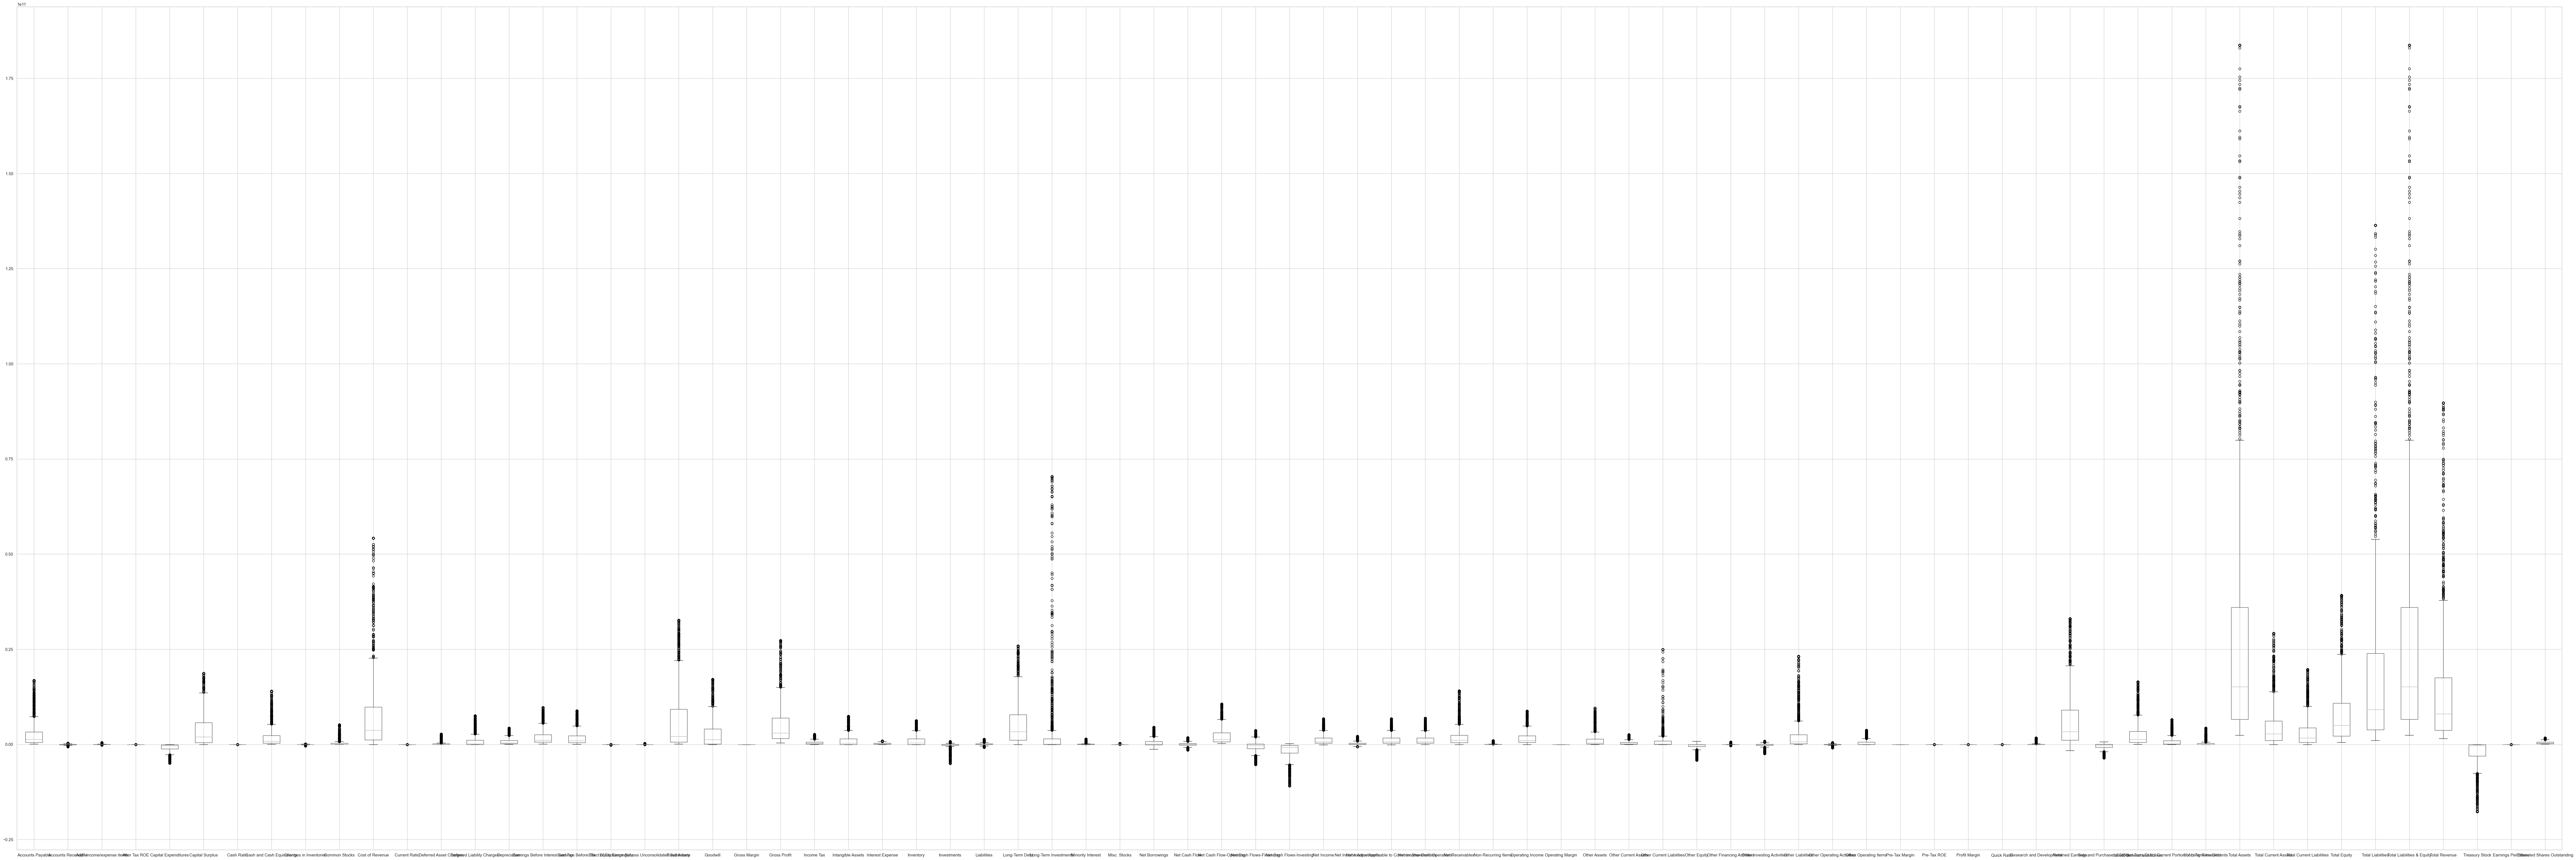

In [19]:
fundamental_table_with_outliers_replaced.boxplot()

<AxesSubplot:>

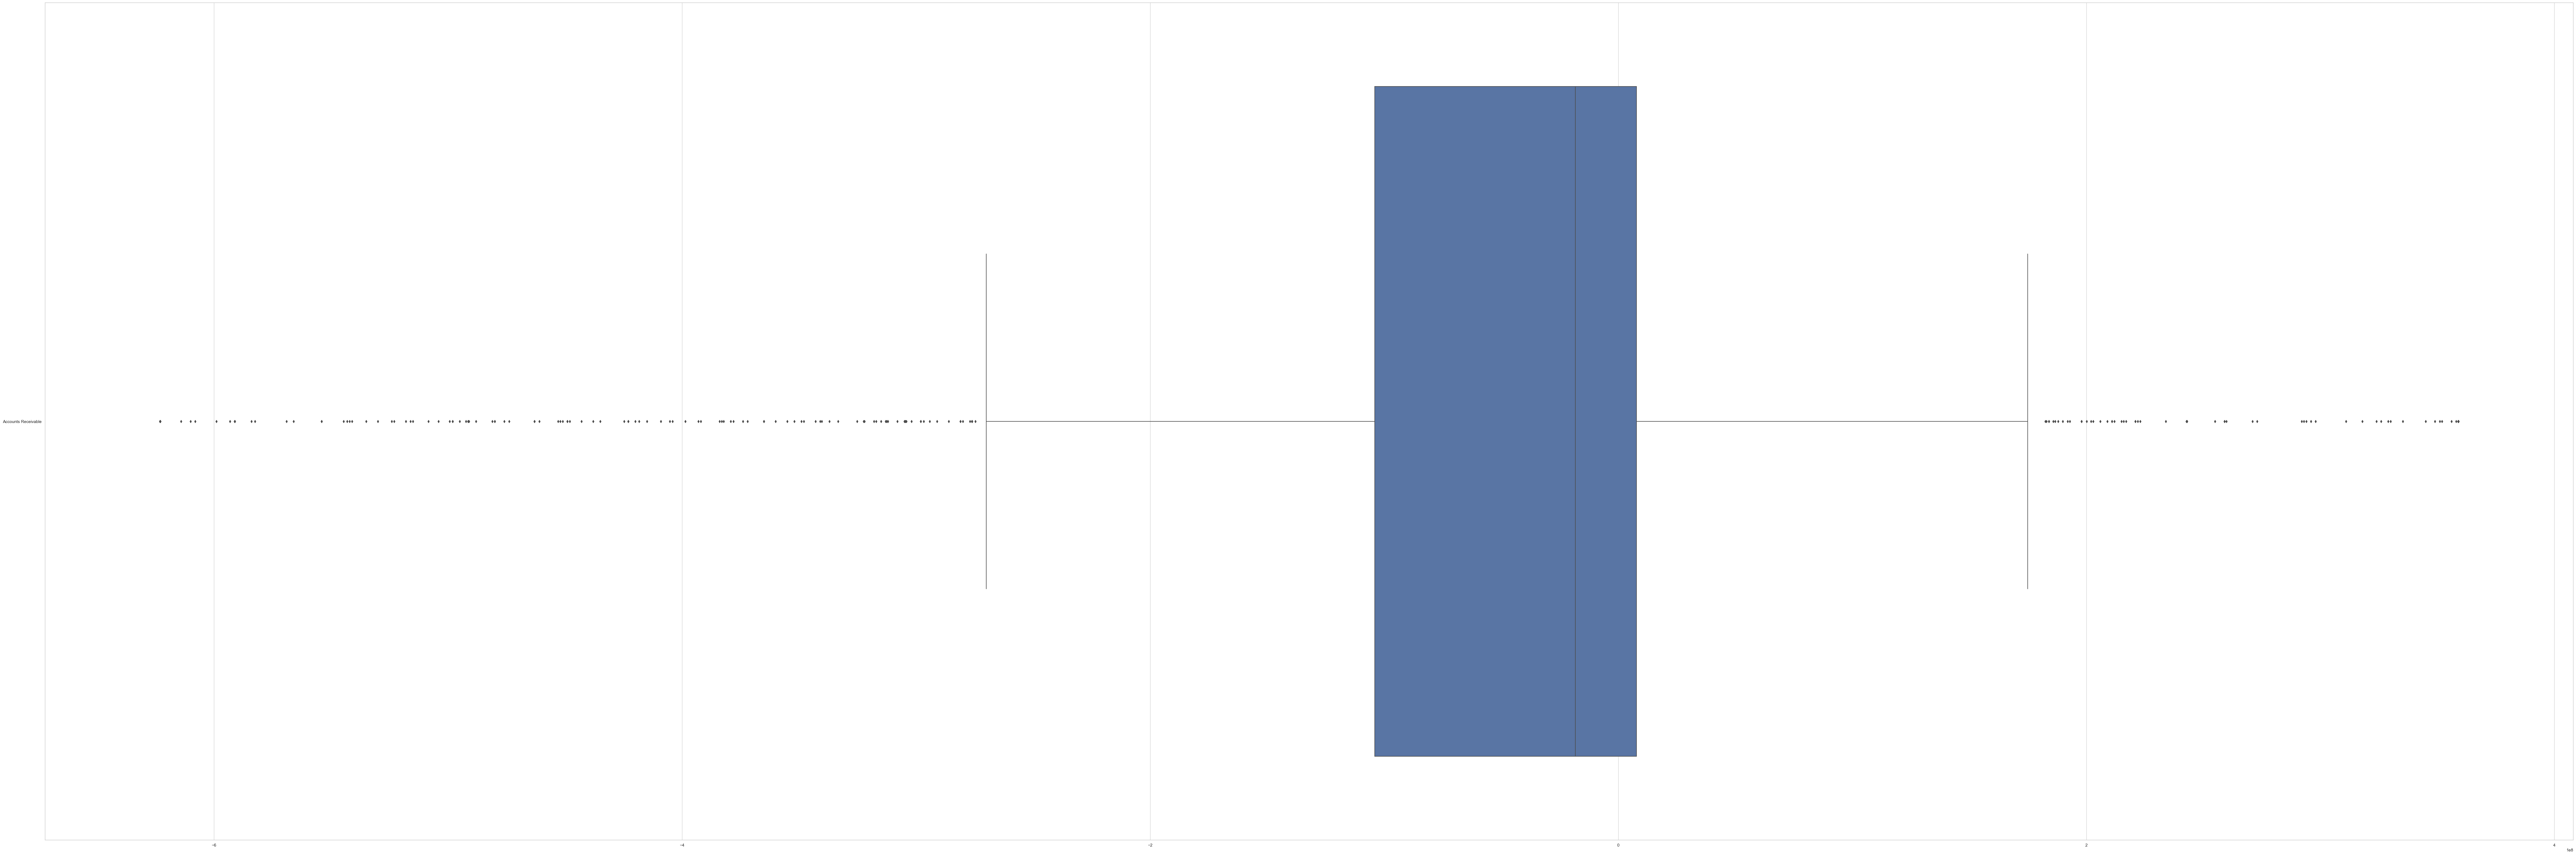

In [20]:
seaborn.boxplot(data=fundamental_table_with_outliers_replaced[['Accounts Receivable']], orient="h")

## Data Transformations 


With histograms we will be observing the skewness of the values for each feature.


array([[<AxesSubplot:title={'center':'Accounts Payable'}>,
        <AxesSubplot:title={'center':'Accounts Receivable'}>,
        <AxesSubplot:title={'center':"Add'l income/expense items"}>,
        <AxesSubplot:title={'center':'After Tax ROE'}>,
        <AxesSubplot:title={'center':'Capital Expenditures'}>,
        <AxesSubplot:title={'center':'Capital Surplus'}>,
        <AxesSubplot:title={'center':'Cash Ratio'}>,
        <AxesSubplot:title={'center':'Cash and Cash Equivalents'}>,
        <AxesSubplot:title={'center':'Changes in Inventories'}>],
       [<AxesSubplot:title={'center':'Common Stocks'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>,
        <AxesSubplot:title={'center':'Current Ratio'}>,
        <AxesSubplot:title={'center':'Deferred Asset Charges'}>,
        <AxesSubplot:title={'center':'Deferred Liability Charges'}>,
        <AxesSubplot:title={'center':'Depreciation'}>,
        <AxesSubplot:title={'center':'Earnings Before Interest and Tax'}>,
        <Axe

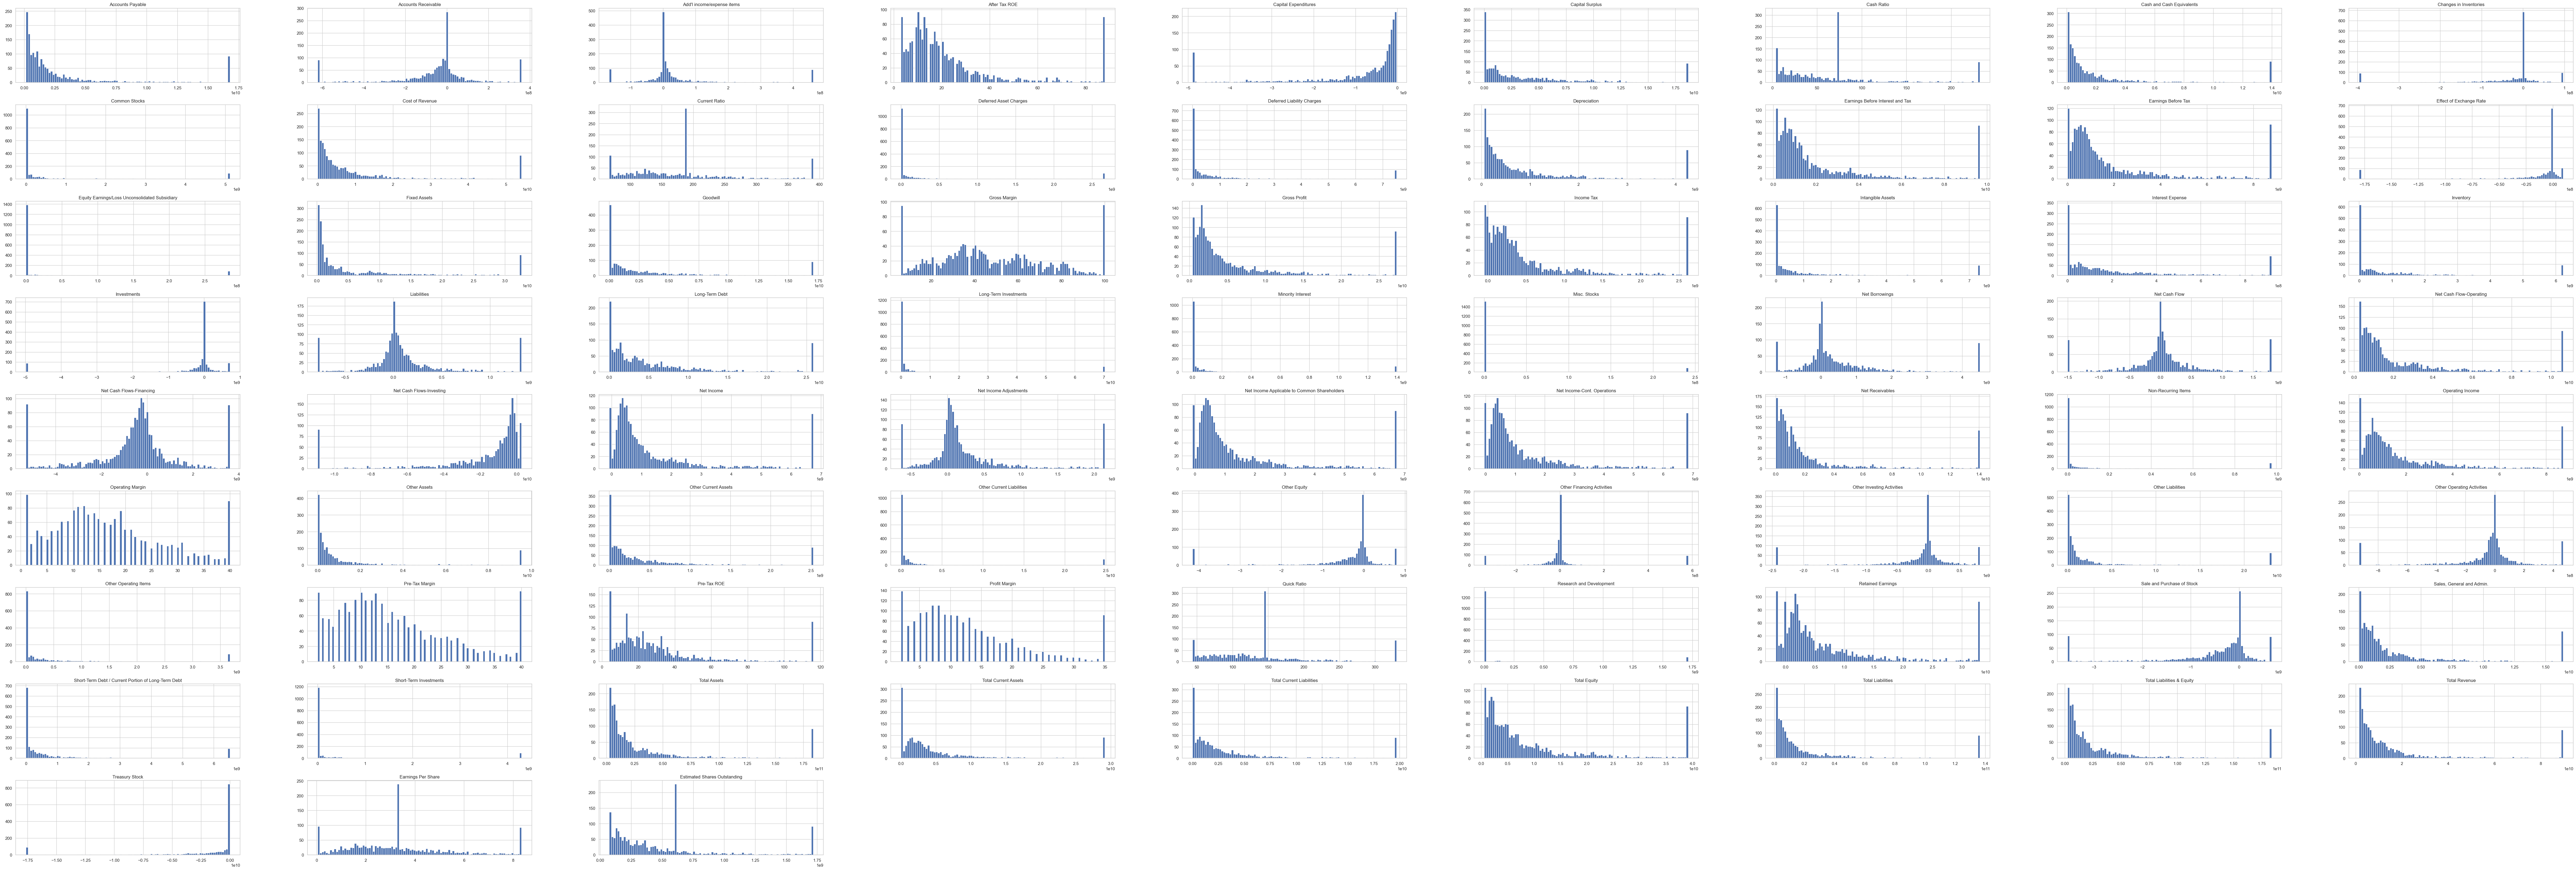

In [21]:
fundamental_table_with_outliers_replaced.hist(bins = 100)

### Grouping the columns according to the skewness

In [22]:
zero_columns = ["Accounts Receivable",
"Add'l income/expense items",
"Changes in Inventories",
"Current Ratio",
"Gross Margin",
"Investments",
"Liabilities",
"Misc. Stocks",
"Net Borrowings",
"Net Cash Flow",
"Net Cash Flows-Financing",
"Net Income Adjustments",
"Other Equity",
"Other Financing Activities",
"Other Investing Activities",
"Other Operating Activities",
"Research and Development",
]

In [23]:
left_skew_columns = ["Accounts Payable",
"After Tax ROE",
"Capital Surplus",
"Cash Ratio",
"Cash and Cash Equivalents",
"Common Stocks",
"Cost of Revenue",
"Deferred Asset Charges",
"Deferred Liability Charges",
"Depreciation",
"Earnings Before Interest and Tax",
"Earnings Before Tax",
"Equity Earnings/Loss Unconsolidated Subsidiary",
"Fixed Assets",
"Goodwill",
"Gross Profit",
"Income Tax",
"Intangible Assets",
"Interest Expense",
"Inventory",
"Long-Term Debt",
"Long-Term Investments",
"Minority Interest",
"Net Cash Flow-Operating",
"Net Income",
"Net Income Applicable to Common Shareholders",
"Net Income-Cont. Operations",
"Net Receivables",
"Non-Recurring Items",
"Operating Income",
"Operating Margin",
"Other Assets",
"Other Current Assets",
"Other Current Liabilities",
"Other Liabilities",
"Other Operating Items",
"Pre-Tax Margin",
"Pre-Tax ROE",
"Profit Margin",
"Quick Ratio",
"Retained Earnings",
"Sales, General and Admin.",
"Short-Term Debt / Current Portion of Long-Term Debt",
"Short-Term Investments",
"Total Assets",
"Total Current Assets",
"Total Current Liabilities",
"Total Equity",
"Total Liabilities",
"Total Liabilities & Equity",
"Total Revenue",
"Earnings Per Share",
"Estimated Shares Outstanding",
]


In [24]:
negative_value_columns = [
"Capital Expenditures",
"Effect of Exchange Rate",
"Net Cash Flows-Investing",
"Sale and Purchase of Stock",
"Treasury Stock",
]

In [25]:
right_skew_columns = [
"Capital Expenditures",
#"Net Cash Flows-Investing",  
]

### Treat left skewed columns

In [26]:
left_skew_columns = list(set(left_skew_columns) - set(zero_columns))

In [27]:
fundamental_table_with_left_skew= fundamental_table_with_outliers_replaced[left_skew_columns].copy()

In [28]:
for j in range(len(left_skew_columns )):
    var = left_skew_columns[j]
    transformed = "log_" + var
    fundamental_table_with_left_skew[var] = np.log10(fundamental_table_with_left_skew[var] + 1 - min(fundamental_table_with_left_skew[var]))

### Treat right skewed distributed columns

In [29]:
fundamental_table_with_right_skew_columns = fundamental_table_with_outliers_replaced[right_skew_columns].copy()

In [30]:
for j in range(len(right_skew_columns )):
    var = right_skew_columns[j]
    fundamental_table_with_right_skew_columns[var] = np.sqrt(fundamental_table_with_right_skew_columns[var])

C:\Users\isharahu\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Treat negative  numbers

In [31]:
fundamental_table_with_negative_treated = fundamental_table_with_outliers_replaced[negative_value_columns].copy()

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
fundamental_table_with_negative_treated[negative_value_columns]  = pt.fit_transform(fundamental_table_with_negative_treated[negative_value_columns])

C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[<AxesSubplot:title={'center':'Accounts Payable'}>,
        <AxesSubplot:title={'center':'Accounts Receivable'}>,
        <AxesSubplot:title={'center':"Add'l income/expense items"}>,
        <AxesSubplot:title={'center':'After Tax ROE'}>,
        <AxesSubplot:title={'center':'Capital Expenditures'}>,
        <AxesSubplot:title={'center':'Capital Surplus'}>,
        <AxesSubplot:title={'center':'Cash Ratio'}>,
        <AxesSubplot:title={'center':'Cash and Cash Equivalents'}>,
        <AxesSubplot:title={'center':'Changes in Inventories'}>],
       [<AxesSubplot:title={'center':'Common Stocks'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>,
        <AxesSubplot:title={'center':'Current Ratio'}>,
        <AxesSubplot:title={'center':'Deferred Asset Charges'}>,
        <AxesSubplot:title={'center':'Deferred Liability Charges'}>,
        <AxesSubplot:title={'center':'Depreciation'}>,
        <AxesSubplot:title={'center':'Earnings Before Interest and Tax'}>,
        <Axe

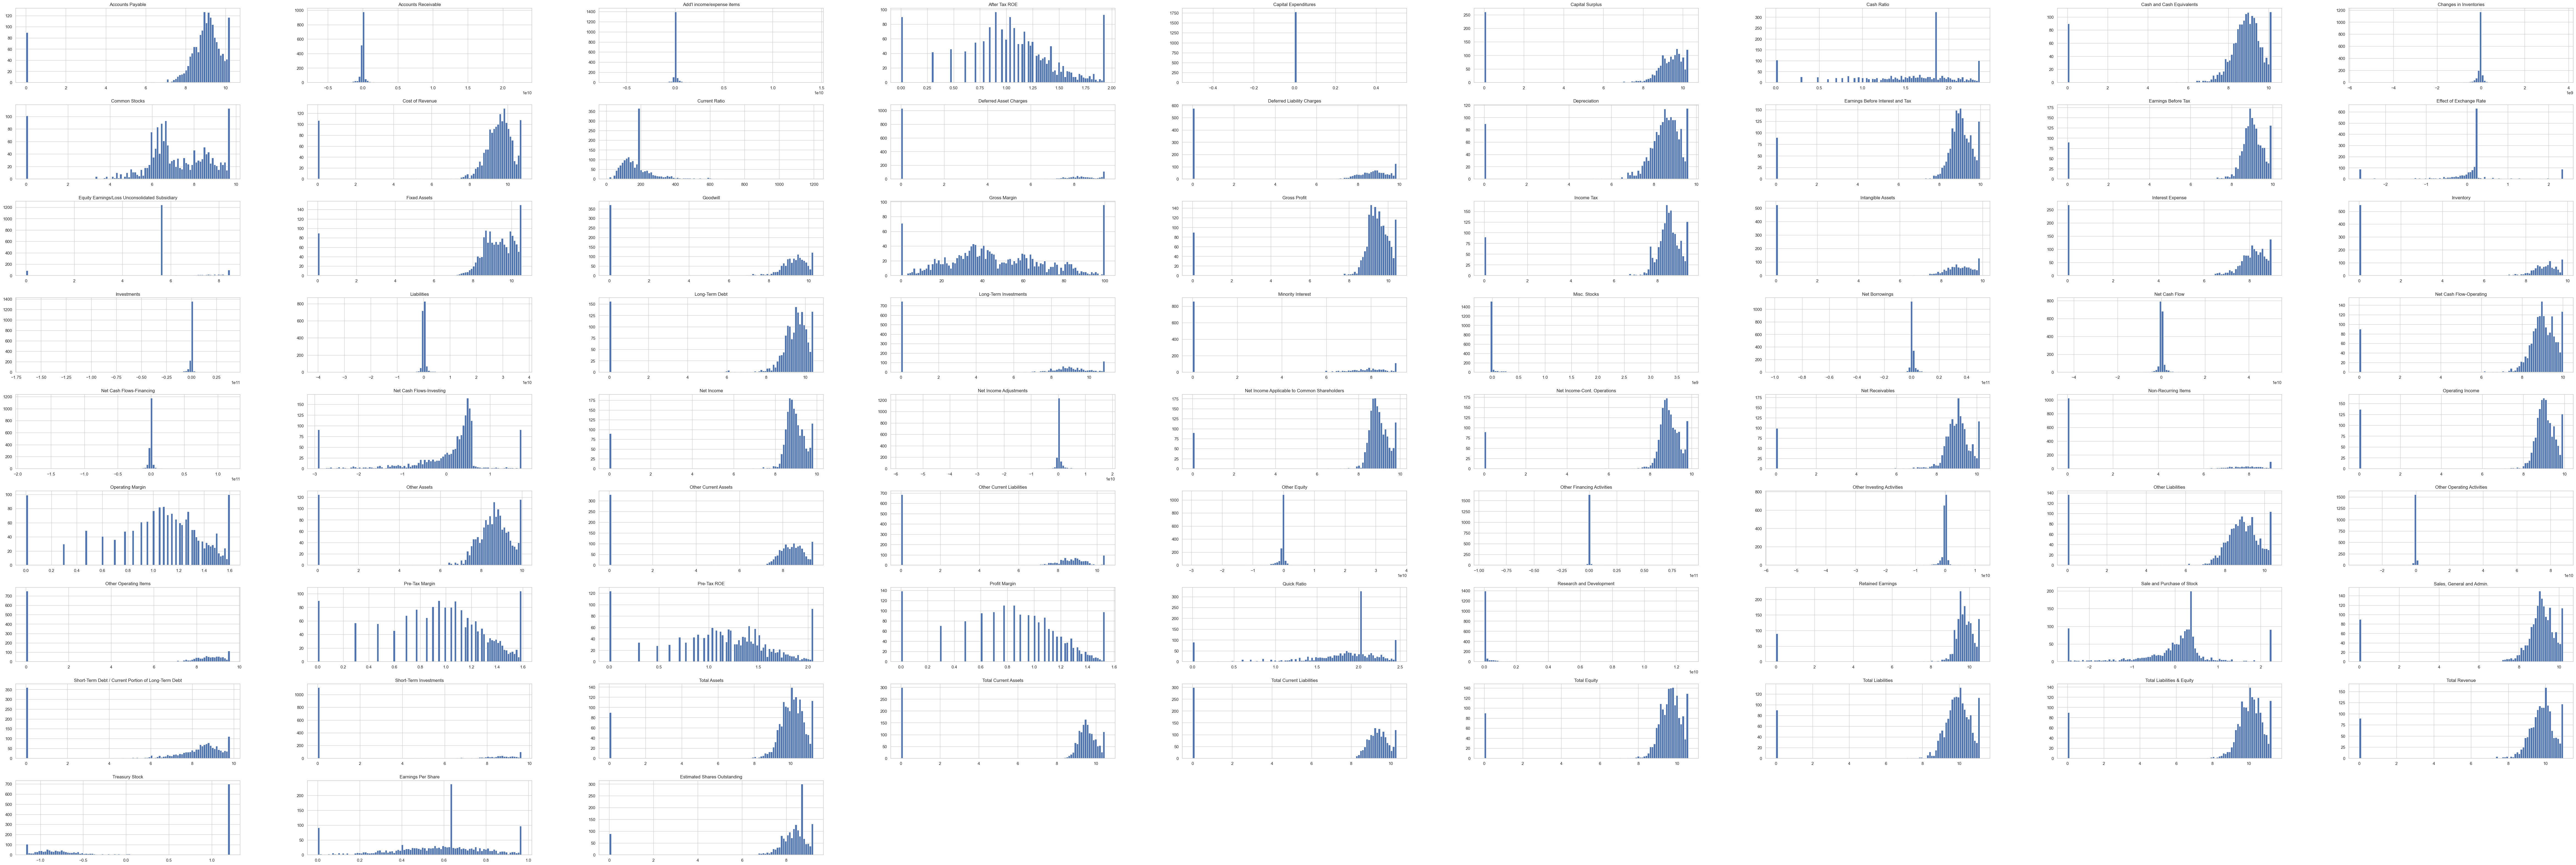

In [33]:
master_table[left_skew_columns] = fundamental_table_with_left_skew
master_table[right_skew_columns] = fundamental_table_with_right_skew_columns
master_table[negative_value_columns]  = fundamental_table_with_negative_treated
master_table.hist(bins = 100)

## Feature Coding

In [34]:
one_hot_encoded_data = master_table['For Year'].copy()

In [35]:
one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data, columns = ['For year'] )
one_hot_encoded_columns = one_hot_encoded_data.columns

C:\Users\isharahu\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
master_table['Ticker Symbol']= le.fit_transform(master_table[['Ticker Symbol']].values)

C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
master_table[one_hot_encoded_columns] = one_hot_encoded_data

## Feature Scaling

In [38]:
"""
Feature Scaling

Feature scaling refers to the methods used to normalize the range of independent variables

Feature magnitude matters for several reasons:

1. the scale of the variable directly influences the regression coefficient
2. variables with a more significant magnitude dominate over the ones with a smaller magnitude range. 
3. gradient descent converges faster when features are on similar scales.
4. feature scaling helps decrease the time to find support vectors for SVMs.
5. euclidean distances are sensitive to feature magnitude.

scaling methods 
1. standardization
2. scale to maximum and minimum - method is very sensitive to outliers. 

"""

'\nFeature Scaling\n\nFeature scaling refers to the methods used to normalize the range of independent variables\n\nFeature magnitude matters for several reasons:\n\n1. the scale of the variable directly influences the regression coefficient\n2. variables with a more significant magnitude dominate over the ones with a smaller magnitude range. \n3. gradient descent converges faster when features are on similar scales.\n4. feature scaling helps decrease the time to find support vectors for SVMs.\n5. euclidean distances are sensitive to feature magnitude.\n\nscaling methods \n1. standardization\n2. scale to maximum and minimum - method is very sensitive to outliers. \n\n'

In [39]:
fundamental_table_with_scaled = master_table[numerical_columns].copy()

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# create the scaler object
scaler =StandardScaler()
scaling_columns = fundamental_table_with_scaled.columns

array_with_scaled = scaler.fit_transform(fundamental_table_with_scaled[scaling_columns])


df_with_scaled=pd.DataFrame(array_with_scaled , columns = scaling_columns )
master_table[scaling_columns]  = df_with_scaled

array([[<AxesSubplot:title={'center':'Accounts Payable'}>,
        <AxesSubplot:title={'center':'Accounts Receivable'}>,
        <AxesSubplot:title={'center':"Add'l income/expense items"}>,
        <AxesSubplot:title={'center':'After Tax ROE'}>,
        <AxesSubplot:title={'center':'Capital Expenditures'}>,
        <AxesSubplot:title={'center':'Capital Surplus'}>,
        <AxesSubplot:title={'center':'Cash Ratio'}>,
        <AxesSubplot:title={'center':'Cash and Cash Equivalents'}>,
        <AxesSubplot:title={'center':'Changes in Inventories'}>],
       [<AxesSubplot:title={'center':'Common Stocks'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>,
        <AxesSubplot:title={'center':'Current Ratio'}>,
        <AxesSubplot:title={'center':'Deferred Asset Charges'}>,
        <AxesSubplot:title={'center':'Deferred Liability Charges'}>,
        <AxesSubplot:title={'center':'Depreciation'}>,
        <AxesSubplot:title={'center':'Earnings Before Interest and Tax'}>,
        <Axe

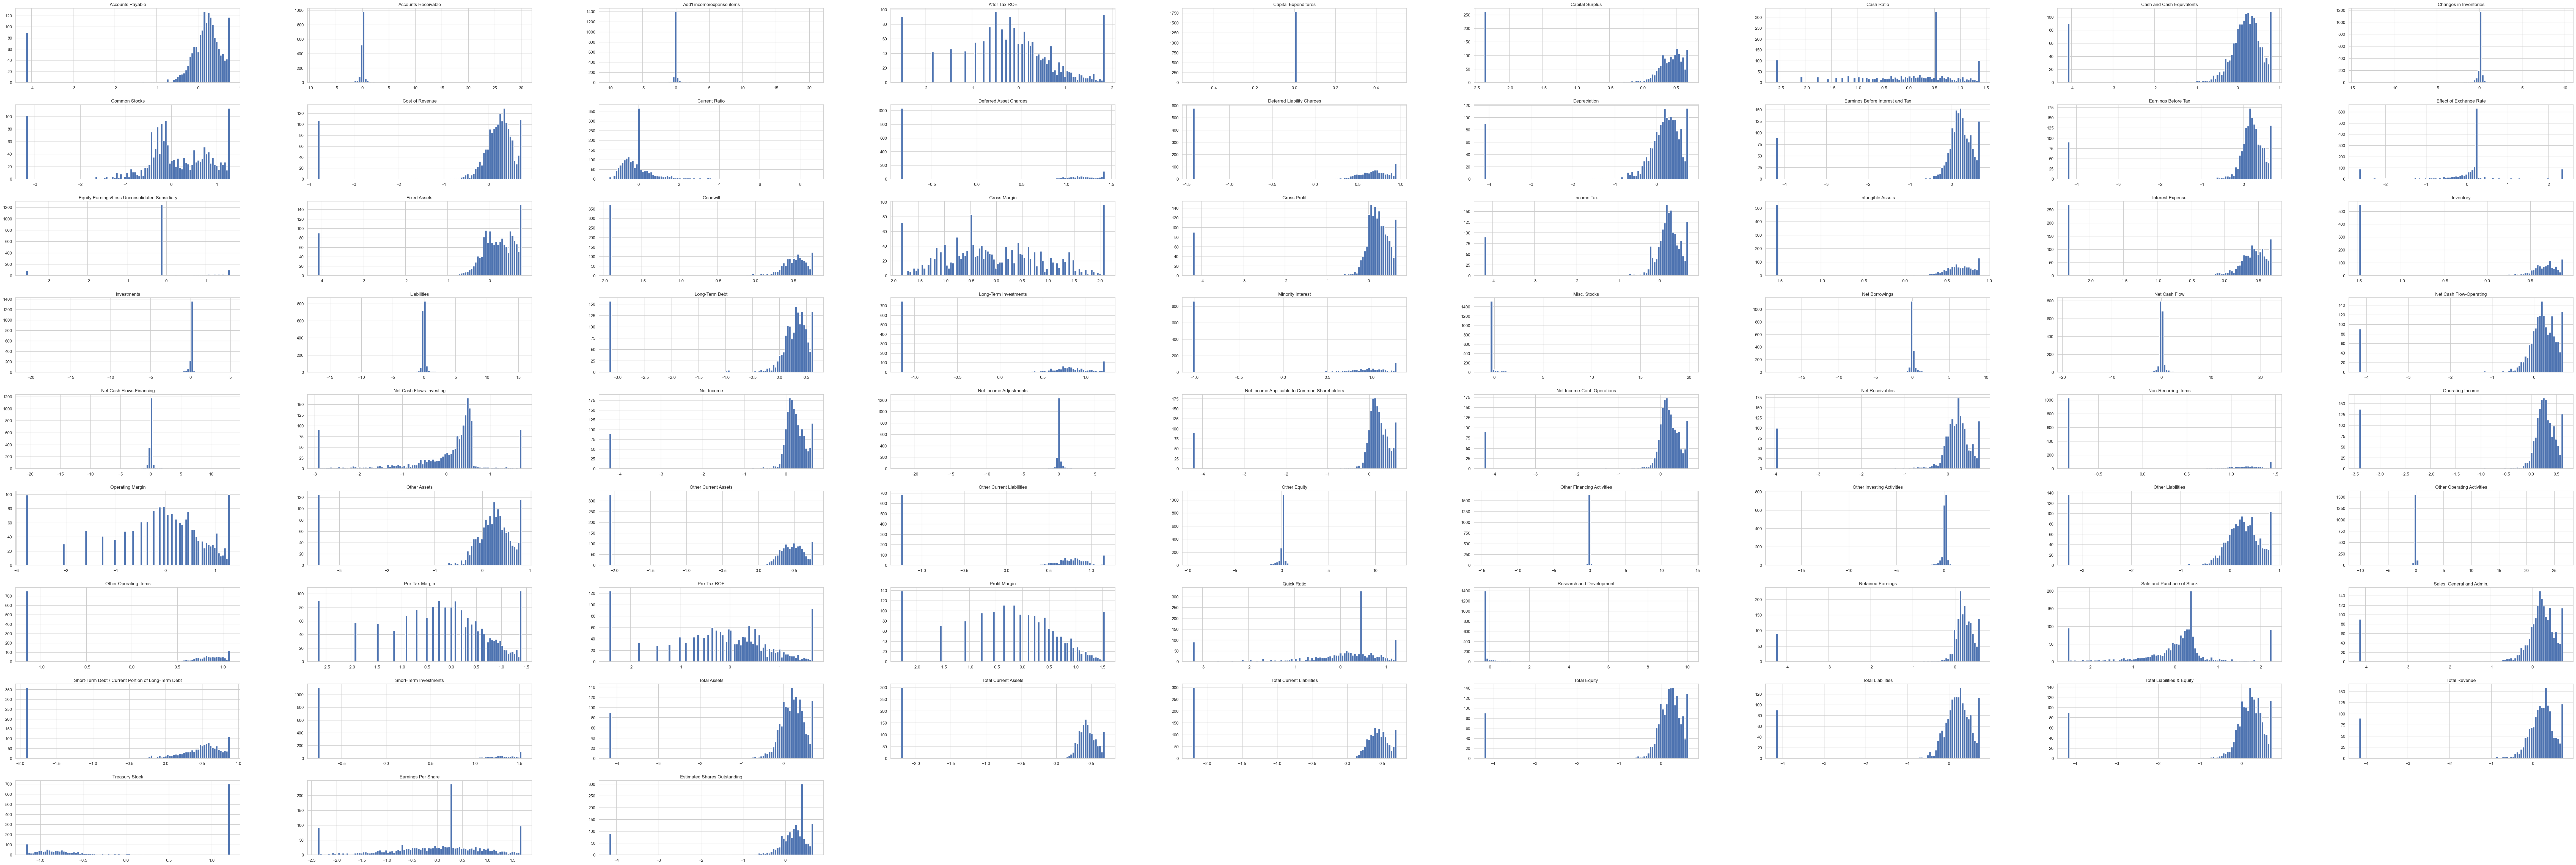

In [41]:
df_with_scaled.hist(bins = 100)

## Feature Discretization

In [42]:
binning_columns = ['After Tax ROE', 
                   'Operating Margin', 
                   'Pre-Tax Margin',
                   'Pre-Tax ROE',
                   'Profit Margin'
                  ]

In [43]:
fundamental_table_with_binning_columns = master_table[binning_columns].copy()

In [44]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
_discretize = discretizer.fit_transform(fundamental_table_with_binning_columns)
df_with_binning_columns = pd.DataFrame(_discretize, columns =  binning_columns )

C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory le

In [45]:
data = master_table.copy().drop(columns = ['Ticker Symbol', 'For Year' ,'Period Ending'])


In [46]:
data.shape

(1781, 81)

In [47]:
data

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0             0.400348            -0.209591                   -2.965270   
1             0.504659            -0.038972                   -4.078293   
2             0.491017            -0.127588                   -0.320015   
3             0.510051             0.549600                   -1.135063   
4             0.347353            -0.034319                   -0.100040   
...                ...                  ...                         ...   
1776         -4.131246             0.084033                   -0.104612   
1777          0.221761            -0.046907                   -0.087770   
1778          0.161935             0.175295                   -0.111141   
1779          0.210033             0.007321                   -0.219230   
1780          0.163050             0.103873                   -0.097995   

      After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0          0.465280                   0.0         0.500854    0.271059   
1          1.572484                   0.0         0.605840    0.536602   
2          1.846829                   0.0         0.651895    0.366478   
3          1.846829                   0.0         0.617470    0.241331   
4          0.814802                   0.0         0.216969   -0.396209   
...             ...                   ...              ...         ...   
1776      -1.838935                   0.0        -2.372797    0.531094   
1777       1.353816                   0.0         0.284508    0.108560   
1778       1.144526                   0.0         0.295760    0.594892   
1779       0.814802                   0.0         0.302836    0.427709   
1780       1.372482                   0.0         0.304357    0.427709   

      Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0                      0.308516                0.173943       0.547867   
1                      0.415445                0.173943      -0.100947   
2                      0.370630                0.173943      -0.033459   
3                      0.263601                0.173943      -0.064378   
4                      0.128659               -0.493099      -1.418963   
...                         ...                     ...            ...   
1776                   0.810543                0.173943       1.275002   
1777                   0.133232               -0.282201      -0.100947   
1778                   0.217363               -0.107944      -0.100947   
1779                   0.277252               -0.497460      -0.100947   
1780                   0.173605               -0.084880      -0.100947   

      Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0            0.429454      -0.931391               -0.844979   
1            0.438327      -0.708757               -0.844979   
2            0.502381      -0.845763               -0.844979   
3            0.439606      -0.974205                1.419757   
4            0.205933      -0.537500               -0.844979   
...               ...            ...                     ...   
1776        -0.554518       0.000000               -0.844979   
1777         0.091859       0.430101                1.035326   
1778         0.097064       1.132254                1.019186   
1779         0.099296       0.241718                1.062924   
1780         0.091529       0.995248                1.079428   

      Deferred Liability Charges  Depreciation  \
0                       0.582983      0.423069   
1                       0.733014      0.427441   
2                       0.720419      0.490740   
3                       0.697661      0.514201   
4                      -1.429054     -0.007605   
...                          ...           ...   
1776                   -1.429054     -0.082730   
1777                    0.621436      0.022428   
1778                    0.605680      0.015094   
1779                    0.600649      0.007506   
1780    

# Feature Engineering

## Feature Reduction using Principal component analysis (PCA)

C:\Users\isharahu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\isharahu\Anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


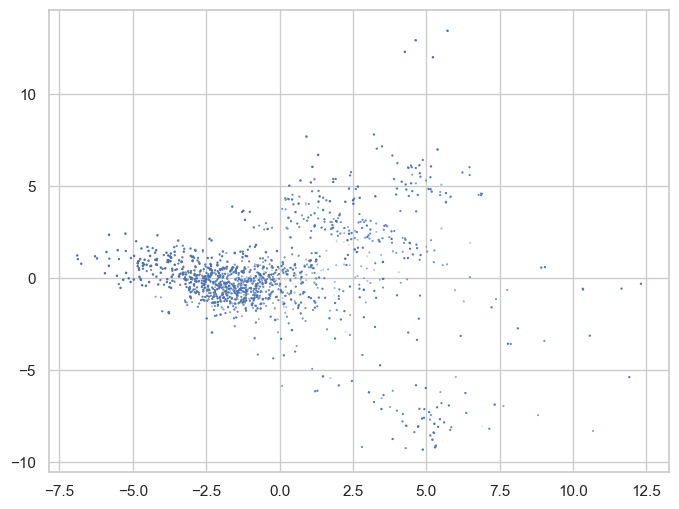

In [48]:
from sklearn.decomposition import PCA


X = data.drop(columns = 'Estimated Shares Outstanding')
y = data['Estimated Shares Outstanding']

# pca - keep 90% of variance
pca = PCA(0.90)
principal_components = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principal_components)
plt.figure(figsize=(8,6))

plot = plt.scatter(principal_components[:,0], principal_components[:,1], y)
plt.show()


In [49]:
data_feature_reduced = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)
data_feature_reduced.head(10)

0         1         2         3         4         5         6  \
0  4.297289 -9.243871 -2.801794  0.174645 -2.762198 -0.474806  1.301573   
1  3.746314 -9.387366 -2.004868  0.292065 -3.723927 -1.073413  1.383314   
2 -2.676322 -1.192790  0.158106  0.452462 -0.802996 -0.848664  0.894923   
3 -3.083612 -0.656339  0.251365  0.890919 -1.627737 -1.157040  1.192501   
4 -1.230532 -0.912277  0.759029 -1.801146  1.381336 -0.851833  0.897821   
5 -1.018153 -0.644069  0.871016 -1.481771  0.807226 -0.161271  0.749736   
6 -2.171793 -1.484934  0.027528 -2.074053  1.868801 -1.389723  0.731081   
7 -1.969541 -1.546991 -0.005676 -1.956153  2.140818 -1.157189  0.838047   
8 -4.885908  2.012221  0.783156 -0.601327 -5.249500  0.583059 -1.490286   
9 -5.897720  1.424267  0.456820 -0.833866 -5.683928  0.109764 -3.220716   

          7         8         9        10        11        12        13  \
0 -3.238094  1.599832 -0.644635 -1.097858 -0.158423  0.197777  3.196865   
1 -2.906346  2.432599 -1.183289 -1.759688 -1.306587  0.349689  3.823575   
2  0.428932  0.774513 -1.331422 -1.078007 -0.066601  0.926318  2.007849   
3 -0.436794  0.636735  0.039455 -0.836884 -0.256403 -0.613325  1.655951   
4 -0.156053  0.582073 -1.072310 -1.133749  0.623714  0.326392  0.719896   
5 -0.019765  0.828807 -0.802479 -1.304449  0.369791  0.458013  0.346347   
6  0.163441  0.270834 -1.559277 -0.499207  0.735556 -0.362577  0.771687   
7  0.399190  0.399577 -1.346600 -0.745516  0.744234 -0.600039  0.594287   
8 -1.591859 -3.593896 -0.813497  1.189791 -0.750345 -0.767570  1.177868   
9 -2.822614 -4.335449 -4.047711  2.437389 -2.071028 -0.033845  0.654588   

         14        15        16        17        18        19        20  \
0 -0.725056  0.445468 -0.319759 -0.727735  0.119402 -0.939238 -0.364418   
1 -1.003373  1.260566 -0.052597 -1.016405  0.010243 -0.966444  0.210629   
2 -1.641357 -0.107902 -0.104157 -1.759338  0.218481  0.154386 -1.668117   
3 -0.859431 -0.424587 -1.783848 -1.445716 -0.417109 -0.070349  0.783456   
4  0.071513 -0.816593  0.555139  0.603782 -0.230566 -0.714825  0.754066   
5  0.276397 -0.634449  0.626456  0.348841 -0.127586 -0.509394  0.544145   
6  0.700515 -0.159186  0.272046  0.381165 -0.769956 -0.117549  0.252082   
7  0.313225 -0.609219  0.488827  0.426142 -0.669687 -0.071523  0.504282   
8 -1.676003 -0.588093  2.641559  2.315165 -0.782015  0.138861 -0.079962   
9 -1.533343 -1.456893  1.647796  3.598020 -1.004184 -0.186844 -2.747765   

         21        22        23        24        25        26        27  \
0  0.963248  2.344528  1.215491 -2.370723 -0.307581 -1.374182 -1.120304   
1  0.335553  1.837446  1.453777 -1.448169 -0.495615 -1.970928 -0.832094   
2 -0.065482  1.640221  0.879626 -0.325804 -0.321081 -1.798802 -1.164842   
3 -1.808706  1.079466 -1.096007 -0.362588 -1.233975 -1.198310 -2.406138   
4 -0.983535 -0.317144  0.531557  0.176738 -0.466254  0.247308 -0.000781   
5 -0.854337 -0.236616  0.392793  0.348565 -0.323005  0.294133 -0.073981   
6 -1.106799 -1.055103  0.144593  0.556556 -0.371192  0.314385 -0.529598   
7 -0.853136 -1.155469  0.291469  0.426508 -0.425853  0.176024 -0.414013   
8 -0.488139  0.011335  1.447795  0.781741 -0.173215 -0.313048 -0.991899   
9 -0.661020 -0.144629  2.003314 -0.313474 -0.373957  0.136137  0.171637   

         28        29        30        31        32        33        34  \
0  0.198186  0.211759  0.190642  0.671693 -0.768820 -0.331343 -0.136804   
1  0.113201  0.703338 -0.014715  0.061356 -1.113525 -0.293634 -0.853368   
2  1.164822 -0.149811  0.228828  0.356922 -0.048390 -1.244014 -0.458458   
3  1.481242 -0.495588  0.576484 -0.029919 -2.944916 -1.178546  0.483021   
4  0.443353 -1.127104  0.135179  0.462841  0.550813 -0.430200 -0.766006   
5  0.335626 -0.969113  0.102629  0.485749  0.284197 -0.082414 -0.749727   
6 -0.017455 -0.379911  0.271926  0.088439  0.574586 -1.035892 -0.374240   
7  0.105531 -0.247007  0.225935  0.025773  0.601496 -1.050325 -0.246079   
8 -1.167894 -0.104904  1.614366

In [50]:
data_feature_reduced.shape

(1781, 45)

# Feature Selection

In [51]:
collect_correlation = []
for col in data_feature_reduced.columns:
    row = (col ,data_feature_reduced[col].corr(data_feature_reduced['Estimated Shares Outstanding']))
    collect_correlation.append(row)

correlation_df = pd.DataFrame( collect_correlation , columns = ['Column' , 'Correlation'])
correlation_df.sort_values(by ='Correlation')

Column  Correlation
2                              2    -0.223856
0                              0    -0.151468
4                              4    -0.147134
8                              8    -0.102453
26                            26    -0.098364
43                            43    -0.064156
24                            24    -0.046962
31                            31    -0.043460
20                            20    -0.035834
19                            19    -0.028482
30                            30    -0.025822
39                            39    -0.022163
15                            15    -0.020852
14                            14    -0.017902
7                              7    -0.013032
23                            23    -0.008508
17                            17    -0.005218
34                            34    -0.002431
27                            27    -0.001050
32                            32    -0.000359
11                            11     0.000296
41                            41     0.001886
33                            33     0.008023
35                            35     0.010923
28                            28     0.012187
1                              1     0.012545
29                            29     0.014093
22                            22     0.018215
18                            18     0.018292
36                            36     0.018825
10                            10     0.022509
9                              9     0.024862
25                            25     0.036720
12                            12     0.039062
37                            37     0.040307
21                            21     0.042646
40                            40     0.045892
16                            16     0.047275
6                              6     0.052422
3                              3     0.069050
13                            13     0.069926
38                            38     0.072958
5                              5     0.082384
42                            42     0.120002
44  Estimated Shares Outstanding     1.000000

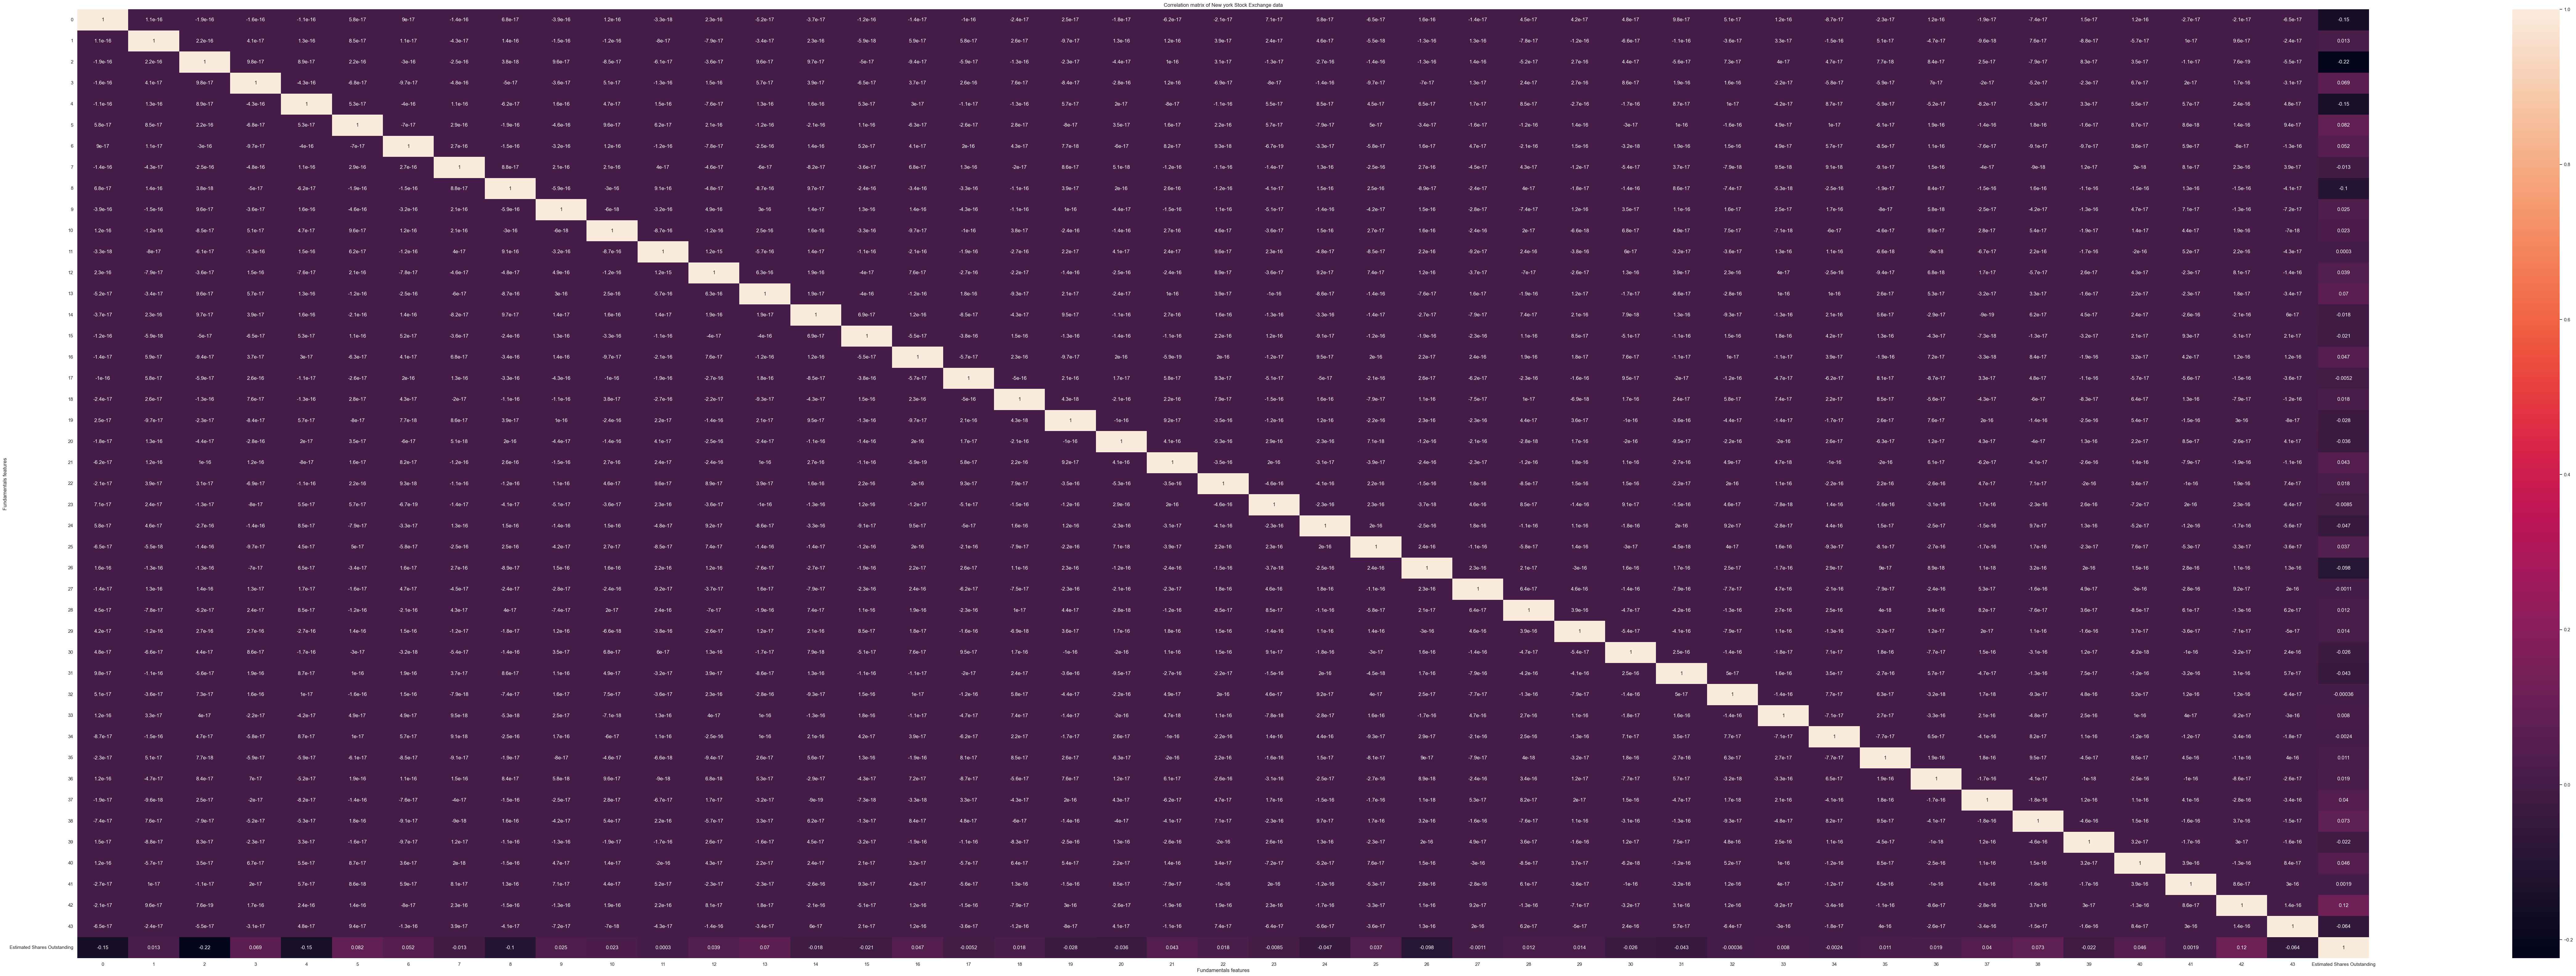

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

df_small = data_feature_reduced.iloc[:,:]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.title("Correlation matrix of New york Stock Exchange data")

plt.xlabel("Fundamentals features")

plt.ylabel("Fundamentals features")

plt.show()

## Split the dataset 

In [53]:
from sklearn.model_selection import train_test_split

X = data_feature_reduced.drop(columns = 'Estimated Shares Outstanding')
y = data_feature_reduced['Estimated Shares Outstanding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Regression 

## 1.  Linear Regression with Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score , KFold , GridSearchCV
import math
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
results = []

In [66]:
def perform_linear_model(X_train, y_train,X_test, y_test):
    model = LinearRegression()
    
    model.fit(
        X_train, y_train,
    )
    
    y_pred = model.predict(X_test)
    
    mse =  mean_squared_error(y_test, y_pred)

    print("Coefficients: \n", model.coef_)

    print("Mean squared error: %.2f" % mse)

    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    rsrt_score = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    print('RMSE: %f' % rmse)
    
    mae = mean_absolute_error(y_test, y_pred)
    
   
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
    print("k -fold cross validation scores: " , scores)
    
    return  mse, rmse ,  rsrt_score , mae 

In [68]:
mse_lr, rmse_lr ,  r2_score_lr , mae_lr = perform_linear_model(X_train, y_train,X_test, y_test)
row = ("linear regression",mse_lr, rmse_lr ,  r2_score_lr , mae_lr)
results.append(row)

Coefficients: 
 [-0.05965035  0.00379843 -0.1076941   0.026109   -0.08165392  0.05622983
  0.01703518 -0.01686785 -0.08157952  0.0136644   0.00030668  0.01201512
  0.03278509  0.06586641 -0.02287315 -0.00840309  0.03603682 -0.00034679
  0.01431462 -0.03310792 -0.04589722  0.03677451  0.02145712  0.00426197
 -0.0589808   0.03139643 -0.10441912  0.00472342  0.01511269  0.02091591
 -0.04348436 -0.05303158 -0.00274685  0.01797966  0.00145501  0.0286051
  0.01453158  0.05770093  0.12628887 -0.02381764  0.03965615  0.01127136
  0.14810372 -0.10485885]
Mean squared error: 0.83
Coefficient of determination: 0.08
RMSE: 0.909293
k -fold cross validation scores:  [ 0.13954289  0.05883334  0.09595966  0.20866877  0.13839668  0.21176593
  0.0949187   0.1785602   0.17771689 -0.13854355]


In [70]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 45))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 44 candidates, totalling 440 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [71]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.100297      0.015385         0.005599        0.006186   
1        0.099571      0.014694         0.002901        0.004925   
2        0.098828      0.006977         0.004527        0.006927   
3        0.098676      0.010325         0.004049        0.006116   
4        0.094148      0.007818         0.004269        0.006286   
5        0.094630      0.009674         0.002348        0.004714   
6        0.098793      0.010049         0.004855        0.005659   
7        0.098275      0.005773         0.003518        0.003247   
8        0.099167      0.008755         0.003250        0.004229   
9        0.092239      0.011212         0.004278        0.006155   
10       0.095287      0.004488         0.000374        0.001123   
11       0.089741      0.006927         0.004883        0.007060   
12       0.093431      0.003101         0.001670        0.002134   
13       0.084497      0.008000         0.001966        0.004642   
14       0.088917      0.007580         0.000590        0.001328   
15       0.082700      0.006817         0.002905        0.002891   
16       0.074804      0.006003         0.002330        0.004023   
17       0.077483      0.007012         0.003580        0.003196   
18       0.073520      0.009878         0.002817        0.004079   
19       0.067186      0.010729         0.003746        0.003771   
20       0.058760      0.012171         0.002382        0.002960   
21       0.061156      0.012515         0.003651        0.005327   
22       0.060748      0.015224         0.005916        0.006886   
23       0.067411      0.006767         0.001027        0.002495   
24       0.056003      0.008741         0.003696        0.006191   
25       0.056979      0.005557         0.008014        0.005191   
26       0.052178      0.005864         0.006438        0.006703   
27       0.050939      0.005580         0.004262        0.006761   
28       0.047818      0.002797         0.003826        0.006254   
29       0.051888      0.008645         0.004766        0.005996   
30       0.042631      0.008141         0.006212        0.006762   
31       0.040876      0.008172         0.001115        0.003346   
32       0.042419      0.005857         0.006160        0.005321   
33       0.040012      0.005653         0.005021        0.005700   
34       0.035320      0.004677         0.003440        0.002603   
35       0.030425      0.006204         0.004079        0.005287   
36       0.029984      0.003205         0.002400        0.002838   
37       0.022579      0.006154         0.003144        0.003472   
38       0.024997      0.007233         0.002350        0.002373   
39       0.019794      0.004987         0.003447        0.004199   
40       0.017822      0.005849         0.005535        0.006666   
41       0.015758      0.004647         0.002866        0.004317   
42       0.013633      0.006562         0.005226        0.004817   
43       0.011528      0.006676         0.001782        0.004661   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}  

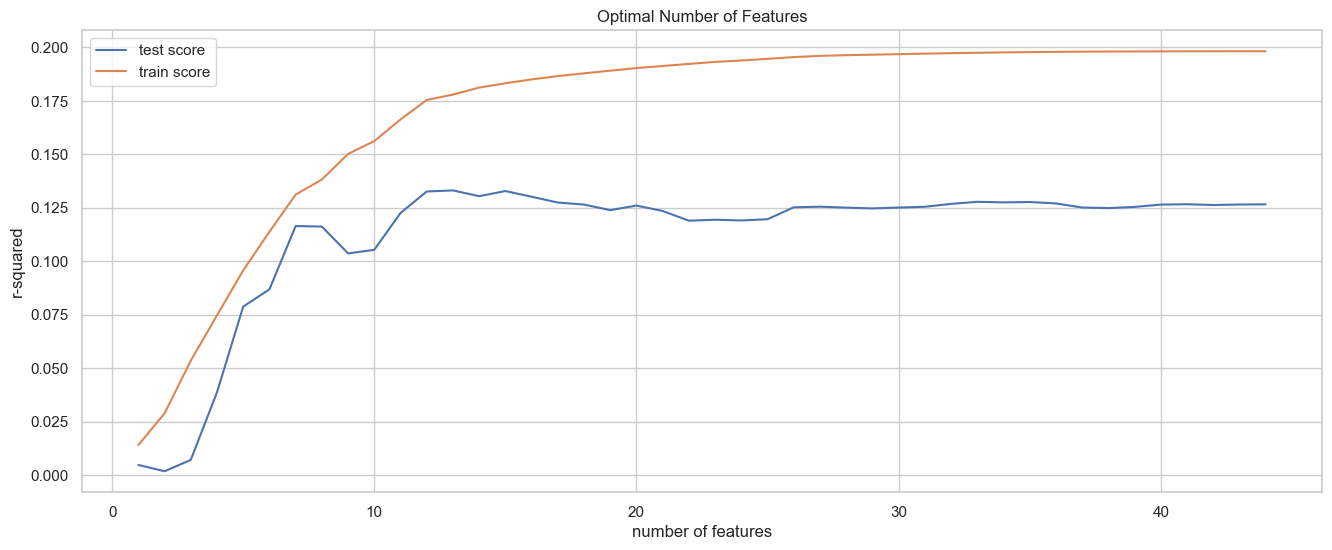

In [72]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [73]:
import sklearn
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.0773145874009733


## 2. Lasso Regression with Cross Validation

In [74]:
def perform_lasso_model(X_train, y_train,X_test, y_test):
    model = Lasso(alpha = 0.1)
    
    model.fit(
        X_train, y_train,
    )
    
    y_pred = model.predict(X_test)
    
    mse =  mean_squared_error(y_test, y_pred)

    print("Coefficients: \n", model.coef_)

    print("Mean squared error: %.2f" % mse)

    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    rsrt_score = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    print('RMSE: %f' % rmse)
    
    mae = mean_absolute_error(y_test, y_pred)
    
   
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
    print("k -fold cross validation scores: " , scores)
    
    return  mse, rmse ,  rsrt_score , mae 

In [75]:
mse_lm, rmse_lm ,  r2_score_lm , mae_lm = perform_linear_model(X_train, y_train,X_test, y_test)
row = ("lasso regression",mse_lm, rmse_lm ,  r2_score_lm , mae_lm )
results.append(row)

Coefficients: 
 [-0.05965035  0.00379843 -0.1076941   0.026109   -0.08165392  0.05622983
  0.01703518 -0.01686785 -0.08157952  0.0136644   0.00030668  0.01201512
  0.03278509  0.06586641 -0.02287315 -0.00840309  0.03603682 -0.00034679
  0.01431462 -0.03310792 -0.04589722  0.03677451  0.02145712  0.00426197
 -0.0589808   0.03139643 -0.10441912  0.00472342  0.01511269  0.02091591
 -0.04348436 -0.05303158 -0.00274685  0.01797966  0.00145501  0.0286051
  0.01453158  0.05770093  0.12628887 -0.02381764  0.03965615  0.01127136
  0.14810372 -0.10485885]
Mean squared error: 0.83
Coefficient of determination: 0.08
RMSE: 0.909293
k -fold cross validation scores:  [ 0.13954289  0.05883334  0.09595966  0.20866877  0.13839668  0.21176593
  0.0949187   0.1785602   0.17771689 -0.13854355]


In [76]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 45))}]


# step-3: perform grid search
# 3.1 specify model
lm = Lasso()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 44 candidates, totalling 440 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=Lasso()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.081873      0.018356         0.001563        0.004688   
1        0.078149      0.007220         0.001770        0.004657   
2        0.077204      0.012711         0.001378        0.003290   
3        0.075287      0.012049         0.004671        0.006764   
4        0.075856      0.010741         0.005184        0.006981   
5        0.079477      0.009108         0.001752        0.003018   
6        0.077167      0.008002         0.003861        0.006204   
7        0.071804      0.007303         0.005343        0.006855   
8        0.077463      0.005898         0.003018        0.004779   
9        0.069945      0.006484         0.007627        0.006397   
10       0.066296      0.011965         0.001302        0.003433   
11       0.063549      0.008500         0.003451        0.004953   
12       0.066943      0.009282         0.005458        0.006826   
13       0.059978      0.009089         0.002904        0.004114   
14       0.065567      0.008407         0.002625        0.003084   
15       0.044962      0.015554         0.004776        0.005801   
16       0.040537      0.015554         0.006954        0.007060   
17       0.054248      0.008374         0.007378        0.006234   
18       0.053455      0.012454         0.003890        0.005995   
19       0.046192      0.009183         0.003591        0.004951   
20       0.050042      0.005709         0.005620        0.004371   
21       0.048519      0.005531         0.005805        0.006532   
22       0.049450      0.007714         0.002175        0.002842   
23       0.047249      0.007122         0.003024        0.004603   
24       0.041943      0.007800         0.004411        0.006790   
25       0.037252      0.006446         0.009364        0.006791   
26       0.040833      0.006791         0.003838        0.006263   
27       0.037013      0.008254         0.002484        0.004056   
28       0.037552      0.007206         0.005947        0.006433   
29       0.031744      0.006593         0.002999        0.005080   
30       0.033599      0.003035         0.004369        0.006652   
31       0.032806      0.008199         0.001033        0.002363   
32       0.028509      0.006812         0.003996        0.006440   
33       0.028985      0.005777         0.003328        0.005882   
34       0.022488      0.007324         0.004121        0.006136   
35       0.022680      0.004238         0.003128        0.003679   
36       0.017280      0.004345         0.001408        0.002387   
37       0.018490      0.003218         0.003857        0.004041   
38       0.017760      0.004010         0.003026        0.003865   
39       0.015896      0.004931         0.004104        0.005387   
40       0.014808      0.007804         0.004011        0.004722   
41       0.012806      0.005617         0.003130        0.004528   
42       0.007022      0.006356         0.003286        0.004907   
43       0.007507      0.004368         0.003140        0.004587   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}  

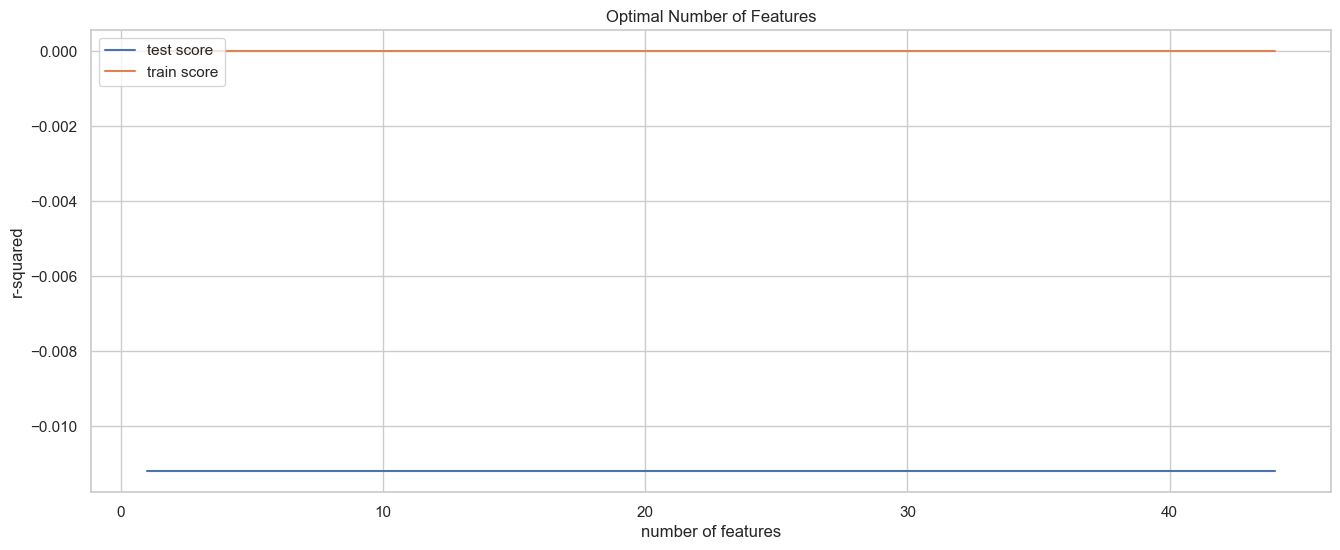

In [78]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [79]:
import sklearn
n_features_optimal = 10

lm = Lasso()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

-0.00025777139815619243


## 3. Ridge Regression with Cross Validation

In [193]:
def perform_ridge_model(X_train, y_train,X_test, y_test):
    model = Ridge(alpha = 0.1)
    
    model.fit(
        X_train, y_train,
    )
    
    y_pred = model.predict(X_test)
    
    mse =  mean_squared_error(y_test, y_pred)

    print("Coefficients: \n", model.coef_)

    print("Mean squared error: %.2f" % mse)

    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    rsrt_score = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    print('RMSE: %f' % rmse)
    
    mae = mean_absolute_error(y_test, y_pred)
    
   
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
    print("k -fold cross validation scores: " , scores)
    
    return  mse, rmse ,  rsrt_score , mae 

In [80]:
mse_rr, rmse_rr ,  r2_score_rr , mae_rr = perform_linear_model(X_train, y_train,X_test, y_test)
row = ("ridge regression",mse_rr, rmse_rr ,  r2_score_rr , mae_rr )
results.append(row)

Coefficients: 
 [-0.05965035  0.00379843 -0.1076941   0.026109   -0.08165392  0.05622983
  0.01703518 -0.01686785 -0.08157952  0.0136644   0.00030668  0.01201512
  0.03278509  0.06586641 -0.02287315 -0.00840309  0.03603682 -0.00034679
  0.01431462 -0.03310792 -0.04589722  0.03677451  0.02145712  0.00426197
 -0.0589808   0.03139643 -0.10441912  0.00472342  0.01511269  0.02091591
 -0.04348436 -0.05303158 -0.00274685  0.01797966  0.00145501  0.0286051
  0.01453158  0.05770093  0.12628887 -0.02381764  0.03965615  0.01127136
  0.14810372 -0.10485885]
Mean squared error: 0.83
Coefficient of determination: 0.08
RMSE: 0.909293
k -fold cross validation scores:  [ 0.13954289  0.05883334  0.09595966  0.20866877  0.13839668  0.21176593
  0.0949187   0.1785602   0.17771689 -0.13854355]


In [84]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 45))}]


# step-3: perform grid search
# 3.1 specify model
lm = Ridge()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 44 candidates, totalling 440 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=Ridge()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.075571      0.026054         0.003224        0.005360   
1        0.073295      0.012732         0.003645        0.005034   
2        0.082821      0.014952         0.010899        0.007004   
3        0.063933      0.019443         0.003459        0.003525   
4        0.075308      0.010138         0.006757        0.006393   
5        0.080199      0.003258         0.003985        0.005033   
6        0.072508      0.010879         0.001079        0.002357   
7        0.079934      0.012613         0.003290        0.004244   
8        0.070742      0.008990         0.001282        0.001373   
9        0.070130      0.009959         0.002968        0.003748   
10       0.070358      0.010642         0.001457        0.002077   
11       0.061286      0.011344         0.006128        0.005695   
12       0.069391      0.008573         0.002153        0.004308   
13       0.068478      0.014262         0.004480        0.004638   
14       0.060831      0.006531         0.006496        0.004592   
15       0.061165      0.007737         0.001973        0.003404   
16       0.061532      0.010567         0.003470        0.002911   
17       0.045723      0.010587         0.004007        0.005193   
18       0.050428      0.010322         0.001897        0.001352   
19       0.056251      0.008395         0.004336        0.005819   
20       0.056515      0.006024         0.002504        0.003845   
21       0.051899      0.009145         0.003117        0.004837   
22       0.052269      0.008123         0.000498        0.001333   
23       0.049606      0.005632         0.002660        0.003279   
24       0.044236      0.003749         0.002246        0.005279   
25       0.043017      0.003855         0.005386        0.004846   
26       0.044772      0.004151         0.003980        0.005890   
27       0.033979      0.008935         0.005597        0.007080   
28       0.036688      0.005721         0.005035        0.004036   
29       0.035397      0.005346         0.004490        0.005677   
30       0.030715      0.007282         0.005677        0.007019   
31       0.033240      0.006867         0.001527        0.002544   
32       0.026520      0.007826         0.001350        0.002966   
33       0.025128      0.007613         0.000000        0.000000   
34       0.024737      0.005301         0.004636        0.003418   
35       0.021850      0.008058         0.006891        0.005739   
36       0.020992      0.004121         0.003013        0.004176   
37       0.020364      0.004872         0.001223        0.003498   
38       0.016035      0.008920         0.003137        0.005808   
39       0.017349      0.005477         0.005376        0.004968   
40       0.012149      0.005731         0.005664        0.005175   
41       0.011257      0.006069         0.003066        0.004592   
42       0.008687      0.005634         0.005075        0.004930   
43       0.007884      0.006113         0.002955        0.004027   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}  

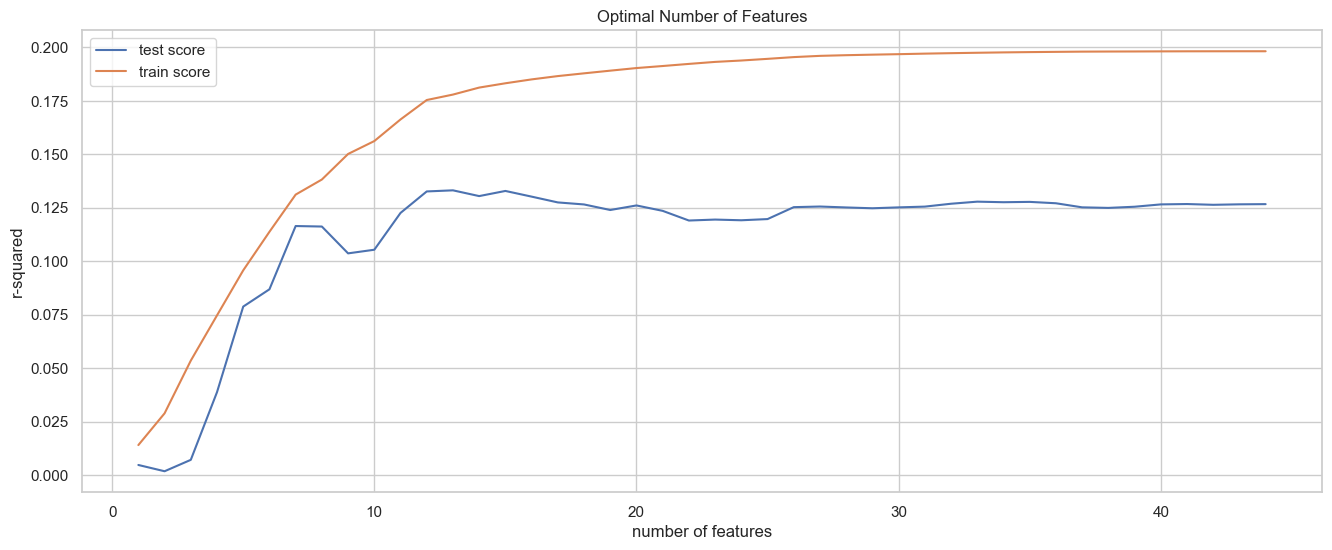

In [86]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [90]:
import sklearn
n_features_optimal = 11

lm = Ridge()
lm.fit(X_train, y_train)

rfe= RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.07736344119989347


## Comparison of performance of each regression model 

Based on MSE – We know that lesser the MSE, better is the
accuracy. The following graph shows the MSE values of
each of the models.

In [83]:
comparison = pd.DataFrame(results, columns = ["model","mse", "rmse" ,  "rsrt_score" , "mae" ] )
comparison

model       mse      rmse  rsrt_score       mae
0  linear regression  0.826814  0.909293    0.077315  0.470135
1   lasso regression  0.826814  0.909293    0.077315  0.470135
2   ridge regression  0.826814  0.909293    0.077315  0.470135

Conclusion is considering the results , all three reression models are good in the same level
and from the research paper I read, https://www.irjet.net/archives/V8/i9/IRJET-V8I9127.pdf , 
it shows support vector regression performs well.